**Library Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Pernyataan Masalah

Analisa ini merupakan pemenuhan Capstone Project Module 2. Analisa ini tidak akan menggunakan machine learning untuk pemecahan masalah ataupun pengolahan datanya. Pendekatan yang digunakan berdasarkan statistik dasar dan juga viualisasi data

# 1. Data Understanding

In [2]:
dftrain = pd.read_csv('train.csv')
dftrain.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
dftest = pd.read_csv('test.csv')
dftest.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


**Dataset**

Dikarenakan dataset ini mempunyai 2 Dataframe = test.csv dan train.csv, dan pada analisa ini tidak menggunakan machine learning. Maka kedua data ini akan digabungkan untuk analisa

In [4]:
df = pd.concat([dftrain,dftest]).reset_index(drop=True)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [6]:
round(df.describe(),2)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,44158.70,64940.50,39.43,1190.32,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.71,15.09
std,31207.38,37493.27,15.12,997.45,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.07,38.47
min,0.00,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,16234.75,32470.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,38963.50,64940.50,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,71433.25,97410.25,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,103903.00,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [7]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


## Penjelasan Data

Data yang digunakan merupakan dataset <a href= https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction>Airline Passenger Satisfaction</a> dari kaggle, yang berisikan data pribadi penumpang, rating kepuasan penumpang dari berbagai aspek, serta kolom apakah scara keseluruhan pelanggan puas atau tidak.<br>
Data ini merupakan hasil survey pelanggan, terdapat 24 kolom dan 129880 baris.

**Kolom**

- `Unnamed: 0`                          - Kolom index bawaan
- `id`                                  - Id penumpang
- `Gender`                              - Jenis kelamin penumpang (male / female)
- `Cutomer Type`                        - Kategori penumpang (Loyal Customer / disloyal customer)
- `Age`                                 - Umur penumpang
- `Type of Travel`                      - Maksud tujuan penerbangan penumpang (Personal Travel, Business Travel)                         
- `Class`                               - Kelas penerbangan (Business, Eco, Eco Plus)                                 
- `Flight Distance`                     - Jarak tempuh perjalanan penumpang

<br>

- `Inflight wifi service`               - **Rating** kepuasan penumpang terhadap wifi pesawat                 
- `Departure/Arrival time convenient`   - **Rating** kepuasan penumpang terhadap waktu penerbangan / kedatangan pesawat      
- `Ease of Online booking`              - **Rating** kepuasan penumpang terhadap kemudahan pembelian tiket secara online                 
- `Gate location`                       - **Rating** kepuasan penumpang terhadap lokasi gerbang keberangkatan                         
- `Food and drink`                      - **Rating** kepuasan penumpang terhadap makanan dan minum                         
- `Online boarding`                     - **Rating** kepuasan penumpang terhadap *Online Boarding*                      
- `Seat comfort`                        - **Rating** kepuasan penumpang terhadap kenyamanan kursi pesawat
- `Inflight entertainment`              - **Rating** kepuasan penumpang terhadap hiburan di dalam pesawat
- `On-board service`                    - **Rating** kepuasan penumpang terhadap *On-board service*
- `Leg room service`                    - **Rating** kepuasan penumpang terhadap ruang gerak kaki
- `Baggage handling`                    - **Rating** kepuasan penumpang terhadap pelayanan bagasi
- `Checkin service`                     - **Rating** kepuasan penumpang terhadap *checkin service*
- `Inflight service`                    - **Rating** kepuasan penumpang terhadap pelayanan dalam pesawat
- `Cleanliness`                         - **Rating** kepuasan penumpang terhadap kebersihan

**\*Semua Rating memiliki nilai (0-5)**


- `Departure Delay in Minutes`          - Keterlambatan berangkat dalam menit
- `Arrival Delay in Minutes `           - Keterlambatan mendarat dalam menit
- `satisfaction`                        - Kepuasan pelanggan secara keseluruhan (Satisfaction, neutral or dissatisfaction)
---
Dikarenakan kolom `Unnamed: 0` dan kolom `Id` tidak berpengaruh terhadap observasi, maka kolom akan di drop

In [8]:
# Drop Kolom

df.drop(columns='Unnamed: 0', inplace=True)
df.drop(columns='id', inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Mencari Anomaly

### **Cek Missing Value**

In [9]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

**Observasi Missing Value**
<br>Terdapat Missing Value pada kolom `Arrival Delay in Minutes`, sebanyak 393

### **Cek Value Kolom Kategorikal**

In [10]:
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

In [11]:
df['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

In [12]:
df['Type of Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

In [13]:
df['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [14]:
df['satisfaction'].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

**Observasi Value Kolom Kategorikal**
- Tidak terdapat salah ketik ataupun value yang tidak wajar pada kolom kategorikal
- Value pada kolom `Gender` dan `satisfaction` tidak berbanding jauh

### **Cek Outlier Kolom Numerikal**
Cek outlier pada kolom Numerikal menggunakan Boxplot

#### Function
Function untuk mencari outlier, lower bound, upperbound, dan mengembalikan dataframe outliernya

In [15]:
# function untuk mencari lower bound, upper bound dan outlier

def f_bound (dataframe, series):                # Input berupa nama dataframe dan nama series (nama series dalam string)
    # Mencari upper bound dan lower bound
    q1 = dataframe[series].quantile(q=0.25)
    q3 = dataframe[series].quantile(q=0.75)
    iqr = q3 - q1
    lower_bound = max(q1 - 1.5 * iqr,0) # lower_bound tidak kurang dari 0, dikarenakan pada kasus ini data tidak memungkinkan untuk memiliki nilai minus
    upper_bound = q3 + 1.5 * iqr

    print(f'Lower bound {series}: {lower_bound}')
    print(f'Upper bound {series}: {upper_bound}')

    # Data frame outlier

    df_out_lb = dataframe[dataframe[series] < lower_bound]
    df_out_ub = dataframe[dataframe[series] > upper_bound]

    print(f'Banyak data yang melebihi lower bound {series}: {len(df_out_lb[series])}')
    print(f'Banyak data yang melebihi upper bound {series}: {len(df_out_ub[series])}')

    print(f'Presentase outlier lower bound {series}: {(len(df_out_lb[series])/len(dataframe)):2%}')
    print(f'Presentase outlier outer bound{series}: {(len(df_out_ub[series])/len(dataframe)):2%}')

    return df_out_lb, df_out_ub


#### Cek Outlier Kolom Age

Text(0.5, 1.0, 'Boxplot Kolom Age')

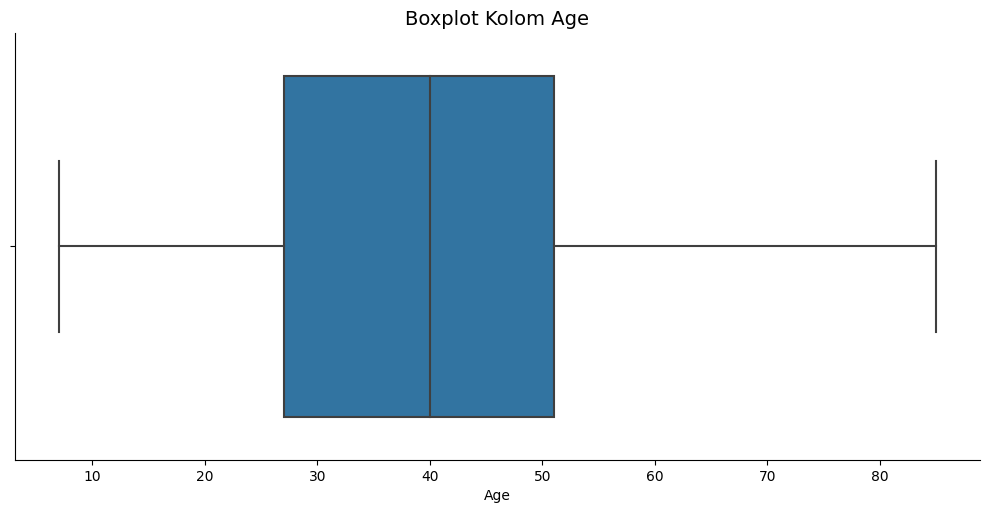

In [89]:
# Barplot untuk kolom Age

sns.catplot(data=df, x='Age', kind='box', aspect=2)
plt.title('Boxplot Kolom Age', fontsize = 14)

In [17]:
f_bound(df, 'Age')

Lower bound Age: 0
Upper bound Age: 87.0
Banyak data yang melebihi lower bound Age: 0
Banyak data yang melebihi upper bound Age: 0
Presentase outlier lower bound Age: 0.000000%
Presentase outlier outer boundAge: 0.000000%


(Empty DataFrame
 Columns: [Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
 Index: []
 
 [0 rows x 23 columns],
 Empty DataFrame
 Columns: [Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
 Index: []
 
 [0 rows x 23 columns])

**Observasi Outlier Kolom `Age`**
- Tidak terdapat outlier
- Upper Bound Age : 87

---

#### Cek Outlier Kolom Flight Distance

Text(0.5, 1.0, 'Boxplot Kolom Flight Distance')

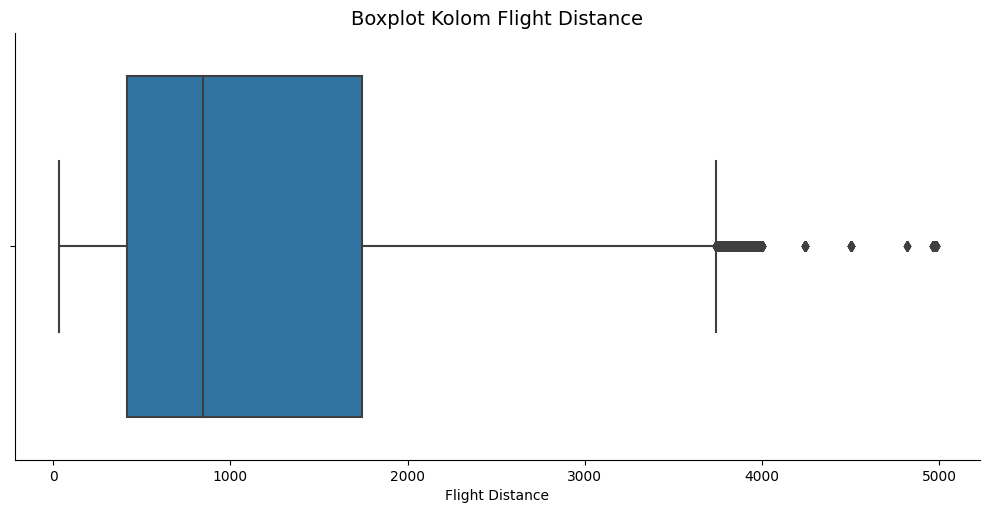

In [90]:
# Mencari outlier pada kolom Flight Distance

sns.catplot(data=df, x='Flight Distance', kind='box', aspect=2)
plt.title('Boxplot Kolom Flight Distance', fontsize = 14)

In [19]:
outlier_l_fd, outlier_u_fd = f_bound(df,'Flight Distance')

Lower bound Flight Distance: 0
Upper bound Flight Distance: 3739.0
Banyak data yang melebihi lower bound Flight Distance: 0
Banyak data yang melebihi upper bound Flight Distance: 2855
Presentase outlier lower bound Flight Distance: 0.000000%
Presentase outlier outer boundFlight Distance: 2.198183%


In [20]:
outlier_u_fd.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
80,Male,Loyal Customer,26,Business travel,Business,3960,1,1,1,1,...,4,4,2,5,4,4,4,45,48.0,satisfied
173,Male,Loyal Customer,52,Business travel,Business,3747,5,5,5,5,...,4,4,4,4,5,4,5,24,20.0,satisfied
201,Female,Loyal Customer,43,Business travel,Business,3854,5,5,5,5,...,5,5,5,5,5,5,3,0,0.0,satisfied
215,Female,Loyal Customer,38,Business travel,Business,3753,2,2,2,2,...,4,4,4,4,4,4,1,0,0.0,satisfied
379,Male,Loyal Customer,46,Business travel,Business,3995,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied


**Observasi Outlier Kolom `Flight Distance`**
- Upper Bound : 3739
- Outlier pada upperbound sebanyak 2855, sebesar 2.198% dari total data penumpang
- Persebaran data tidak normal

---

#### Cek Outlier Kolom `Departure Delay in Minutes`

Text(0.5, 1.0, 'Boxplot Kolom Departure Delay in Minutes')

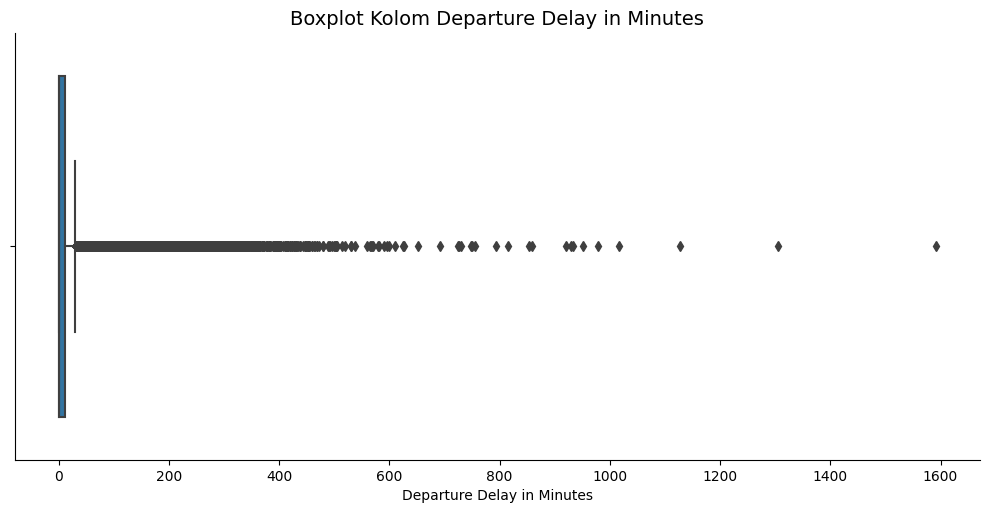

In [91]:
sns.catplot(data=df, x='Departure Delay in Minutes', kind='box', aspect=2)
plt.title('Boxplot Kolom Departure Delay in Minutes', fontsize = 14)

In [22]:
outlier_l_ddm, outlier_u_ddm = f_bound(df,'Departure Delay in Minutes')

Lower bound Departure Delay in Minutes: 0
Upper bound Departure Delay in Minutes: 30.0
Banyak data yang melebihi lower bound Departure Delay in Minutes: 0
Banyak data yang melebihi upper bound Departure Delay in Minutes: 18098
Presentase outlier lower bound Departure Delay in Minutes: 0.000000%
Presentase outlier outer boundDeparture Delay in Minutes: 13.934401%


In [23]:
outlier_u_ddm.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
14,Female,Loyal Customer,26,Personal Travel,Eco,453,3,2,3,2,...,2,4,3,2,2,1,2,43,35.0,neutral or dissatisfied
16,Female,Loyal Customer,26,Business travel,Business,2123,3,3,3,3,...,4,5,3,4,5,4,4,49,51.0,satisfied
22,Female,Loyal Customer,43,Personal Travel,Eco,752,3,5,3,5,...,3,3,3,5,3,3,4,52,29.0,neutral or dissatisfied
24,Female,disloyal Customer,23,Business travel,Eco,452,5,0,5,1,...,1,4,5,5,3,5,1,54,44.0,satisfied
32,Female,Loyal Customer,35,Business travel,Business,2611,4,5,4,4,...,3,3,4,5,4,3,4,109,120.0,satisfied


**Observasi Outlier Kolom `Departure Delay in Minutes`**
- Upper Bound : 30 (menit)
- Outlier pada upperbound sebanyak 18098, sebesar 13.934% dari total data penumpang
- Persebaran Data tidak normal
---

#### Cek Outlier Kolom `Arrival Delay in Minutes`

Text(0.5, 1.0, 'Boxplot Kolom Arrival Delay in Minutes')

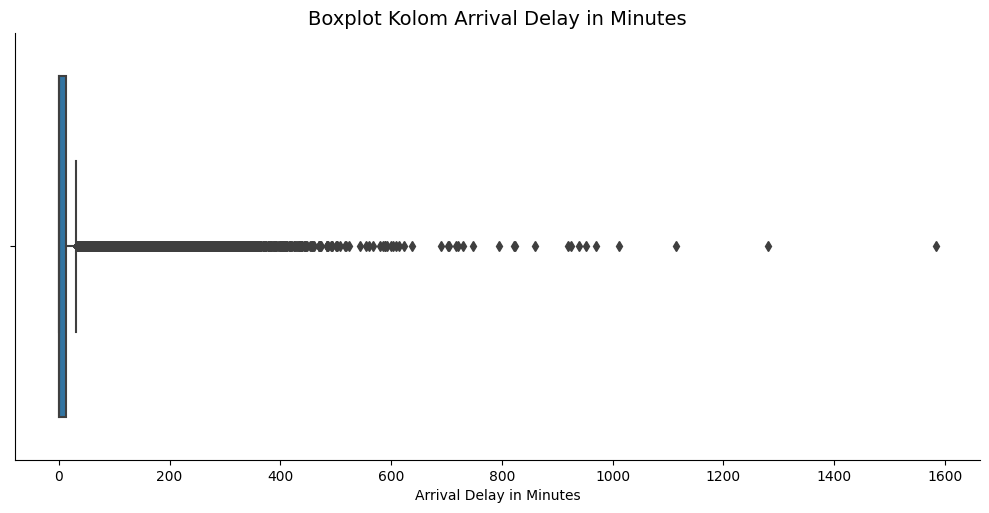

In [92]:
sns.catplot(data=df, x='Arrival Delay in Minutes', kind='box', aspect=2)
plt.title('Boxplot Kolom Arrival Delay in Minutes', fontsize = 14)

In [25]:
outlier_l_adm, outlier_u_adm = f_bound(df,'Arrival Delay in Minutes')

Lower bound Arrival Delay in Minutes: 0
Upper bound Arrival Delay in Minutes: 32.5
Banyak data yang melebihi lower bound Arrival Delay in Minutes: 0
Banyak data yang melebihi upper bound Arrival Delay in Minutes: 17492
Presentase outlier lower bound Arrival Delay in Minutes: 0.000000%
Presentase outlier outer boundArrival Delay in Minutes: 13.467816%


In [26]:
outlier_u_adm.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
14,Female,Loyal Customer,26,Personal Travel,Eco,453,3,2,3,2,...,2,4,3,2,2,1,2,43,35.0,neutral or dissatisfied
16,Female,Loyal Customer,26,Business travel,Business,2123,3,3,3,3,...,4,5,3,4,5,4,4,49,51.0,satisfied
24,Female,disloyal Customer,23,Business travel,Eco,452,5,0,5,1,...,1,4,5,5,3,5,1,54,44.0,satisfied
32,Female,Loyal Customer,35,Business travel,Business,2611,4,5,4,4,...,3,3,4,5,4,3,4,109,120.0,satisfied
55,Female,Loyal Customer,45,Business travel,Business,3334,2,4,2,2,...,4,4,4,4,3,4,5,51,48.0,satisfied


**Observasi Outlier Kolom `Arrival Delay in Minutes`**
- Upper Bound : 32.5 (menit)
- Outlier pada upperbound sebanyak 17492, sebesar 13.467% dari total data penumpang
- Persebaran Data tidak normal
---

#### Cek Outlier Kolom Rating Kepuasan

In [27]:
round(df.describe(),2).iloc[1:,6:-3]

,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service
mean,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64
std,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00
50%,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00
75%,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [28]:
# Mengumpulkan nama nama Kolom

rating_column = list(df.iloc[:,6:-3].columns)
rating_column

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [93]:
# Looping menggunakan function untuk mencari outlier

lowerBound = []
upperBound = []
n_lowerBound = []
n_upperBound = []

for i in rating_column:
    # Mencari upper bound dan lower bound
    q1 = df[i].quantile(q=0.25)
    q3 = df[i].quantile(q=0.75)
    iqr = q3 - q1
    lower_bound = max(q1 - 1.5 * iqr,0)     # lower_bound tidak kurang dari 0, dikarenakan pada kasus ini data tidak memungkinkan untuk memiliki nilai minus
    upper_bound = q3 + 1.5 * iqr

    # Update nilai ke list
    lowerBound.append(lower_bound)
    upperBound.append(upper_bound)

    # Mencari data frame outlier
    df_out_lb = df[df[i] < lower_bound]
    df_out_ub = df[df[i] > upper_bound]

    # Update jumlah outlier ke list
    n_lowerBound.append(len(df_out_lb))
    n_upperBound.append(len(df_out_ub))

print(f'Presentase outlier {16109/len(df)} %')

# Mengubah list menjadi dataframe
pd.DataFrame(data={'Kolom':rating_column, 'Lower Bound':lowerBound, 'Upper Bound':upperBound, 'Jumlah Outlier Lower':n_lowerBound, 'Jumlah Outlier Upper':n_upperBound})

Presentase outlier 0.12402987372959655 %


,Kolom,Lower Bound,Upper Bound,Jumlah Outlier Lower,Jumlah Outlier Upper
0,Inflight wifi service,0.0,7.0,0,0
1,Departure/Arrival time convenient,0.0,7.0,0,0
2,Ease of Online booking,0.0,7.0,0,0
3,Gate location,0.0,7.0,0,0
4,Food and drink,0.0,7.0,0,0
5,Online boarding,0.0,7.0,0,0
6,Seat comfort,0.0,9.5,0,0
7,Inflight entertainment,0.0,7.0,0,0
8,On-board service,0.0,7.0,0,0
9,Leg room service,0.0,7.0,0,0


In [30]:
# Cek Kolom `Checkin service`


outlier_l_cs = df[df['Checkin service'] < 1.5]
outlier_l_cs.head()

Presentase outlier 0.12402987372959655 %


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
15,Male,disloyal Customer,13,Business travel,Eco,486,2,1,2,3,...,4,2,1,4,1,3,4,1,0.0,neutral or dissatisfied
30,Female,Loyal Customer,31,Business travel,Business,819,4,4,4,4,...,5,5,4,3,1,5,5,0,0.0,satisfied
34,Male,disloyal Customer,37,Business travel,Business,1182,3,3,3,4,...,1,4,1,3,1,4,1,9,0.0,neutral or dissatisfied


**Observasi Outlier Kolom Rating Kepuasaan**
- Hanya kolom `Checkin Service` yang memiliki outlier dibawah lower bound, sebanyak 16109, presentase sebesar 0.124% 

---
---

# 2. Missing Value Treatment

**Pendekatan**
<br>Pendekatan yang digunakan untuk mengisi missing value kolom `Arrival Delay in Minutes`:

- Dataset akan dibagi berdasarkan `satisfaction` menjadi 2 dataset yaitu:
    - df_sat : dataset ketika `Arrival Delay in Minutes` != NaN dan `satisfaction` = satisfied 
    - df_dis : Dataset ketika `Arrival Delay in Minutes` != NaN dan `satisfaction` = neutral or dissatisfied 
<br><br>
- Mencari distribusi dari kedua dataset diatas, jika dataset tersebut:
    - Berdistribusi normal, missing value = mean dari `Arrival Delay in Minutes` sesuai dengan value `satisfaction`-nya
    - Tidak berdistribusi normal, missing value = median dari `Arrival Delay in Minutes` sesuai dengan value `satisfaction`-nya

In [31]:
# Mengambil df ketika kolom Arrival Delay in Minutes null

df_null = df[df.isna()['Arrival Delay in Minutes']]
df_null.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied


In [32]:
# Mencari df 'Arrival Delay in Minutes' yang tidak NaN berdasarkan satisfaction

df_sat = df[(df['Arrival Delay in Minutes'] != df['Arrival Delay in Minutes'].isna()) & (df['satisfaction'] == 'satisfied')]
df_dis = df[(df['Arrival Delay in Minutes'] != df['Arrival Delay in Minutes'].isna()) & (df['satisfaction'] != 'satisfied')]

In [33]:
# Data telah terpisah

df_sat.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
16,Female,Loyal Customer,26,Business travel,Business,2123,3,3,3,3,...,4,5,3,4,5,4,4,49,51.0,satisfied
17,Male,Loyal Customer,41,Business travel,Business,2075,4,4,2,4,...,5,5,5,5,3,5,5,0,10.0,satisfied
18,Female,Loyal Customer,45,Business travel,Business,2486,4,4,4,4,...,5,5,5,5,3,5,4,7,5.0,satisfied
24,Female,disloyal Customer,23,Business travel,Eco,452,5,0,5,1,...,1,4,5,5,3,5,1,54,44.0,satisfied
27,Female,Loyal Customer,49,Business travel,Eco Plus,315,4,4,4,4,...,4,4,4,4,2,4,2,0,8.0,satisfied


### **Uji Statistik**

Mencari distribusi data menggunakan metode D’Agostino and Person’s 

In [34]:
stat, pvalue = normaltest(df['Arrival Delay in Minutes'])
print(f'Pvalue dari data Arrival Delay in Minutes adalah {pvalue}')


Pvalue dari data Arrival Delay in Minutes adalah nan


 **Interpretasi**

pvalue <= 0.05
Maka, data `Arrival Delay in Minutes` tidak berdistribusi normal

---

### **Mengisi Missing Value**
Dikarenakan df_sat & df_dis tidak berdistribusi normal, maka missing value akan diisi dengan median

In [35]:
# Mencari nilai median
median_sat = df_sat['Arrival Delay in Minutes'].median()
median_dis = df_dis['Arrival Delay in Minutes'].median()

print(f'median ketika satisfied = {median_sat}')
print(f'median ketika neutral or dissatisfied = {median_dis}')

median ketika satisfied = 15.0
median ketika neutral or dissatisfied = 18.0


In [36]:
# Kondisi untuk slicing
con1 = (df.isna()['Arrival Delay in Minutes']) & (df['satisfaction'] == 'satisfied') # kondisi untuk slicing NaN ketika satisfied
con2 = (df.isna()['Arrival Delay in Minutes']) & (df['satisfaction'] != 'satisfied') # kondisi untuk slicing NaN ketika tidak satisfied

# Mengisi nilai missing value
df.loc[con1] = df.loc[con1].fillna(value=15)
df.loc[con2] = df.loc[con2].fillna(value=18)

In [37]:
# Sudah tidak terdapat data null

df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [38]:
# Export csv yang sudah data cleansing

df.to_csv('Dataset.csv', index=False)

**Export Data**

Data di ekspor agar bisa diolah pada app lain

---
---

# 3. Analisis Data

In [39]:
# Membagi database menjadi satisfied & tidak

df_sat = df[df['satisfaction'] == 'satisfied']
df_dis = df[df['satisfaction'] != 'satisfied']

## **Kolom `Age`**
Mencari Hubungan antara `Age` dengan `satisfaction`

Pendekatan:
- Data akan dibagi 2 berdasarkan kelompok `satisfaction`
- Kedua data akan diperbandingkan dengan grafik ataupun metode statistika

---

### Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

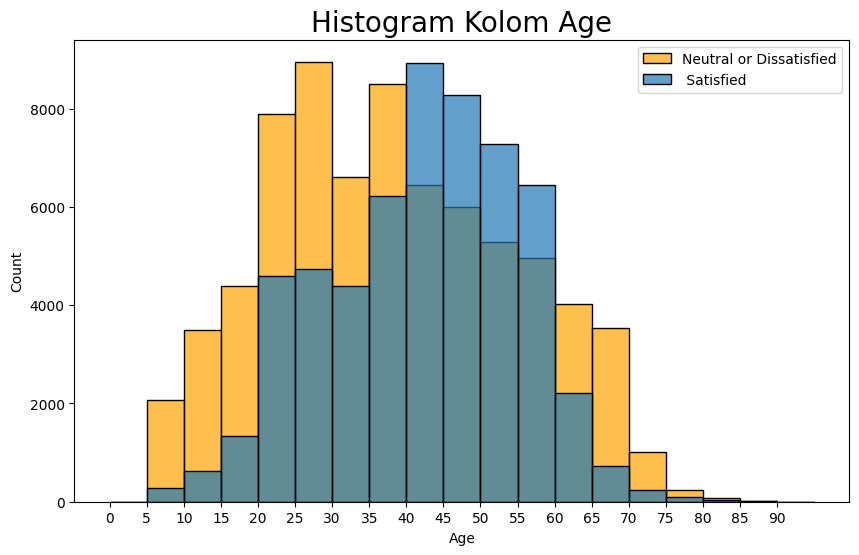

In [40]:
# Membagi database Age berdasarkan satisfaction

plt.figure(figsize=(10,6))
age_range = list(range(0,100,5))
sns.histplot(x=df_dis['Age'],bins=age_range, alpha = 0.7, color= 'orange')
sns.histplot(x=df_sat['Age'],bins=age_range, alpha= 0.7).set_title('Histogram Kolom Age', fontsize= 20)
plt.legend(['Neutral or Dissatisfied', ' Satisfied'])
plt.xticks(range(0,91,5))
plt.show

*Interpretasi Histogram*<br>
Persebaran data sedikit berbeda antara kedua kelompok, dimana kelompok `Neutral or Dissatisfied` memiliki persebaran data ke arah usia yang lebih muda dibanding kelompok `satisfied`

### Normality Test

In [41]:
# Tes Normalitas

result_d = normaltest(df_dis['Age'])
print(f'Pvalue data kolom `Age` ketika kondisi `Neutral or Dissatisfied` adalah {result_d[1]}')

result_s = normaltest(df_sat['Age'])
print(f'Pvalue data kolom `Age` ketika kondisi `satisfied` adalah {result_s[1]}')

Pvalue data kolom `Age` ketika kondisi `Neutral or Dissatisfied` adalah 0.0
Pvalue data kolom `Age` ketika kondisi `satisfied` adalah 0.0


*Interpretasi Tes Normalitas*<br>
Jika pvalue < 0.05, maka **TIDAK** diasumsikan data memiliki distribusi normal<br>
Dari hasil tes diatas dapat disimpulkan bahwa:
- Kolom `Age` ketika kondisi `Neutral or Dissatisfied` tidak diasumsikan berdistribusi normal
- Kolom `Age` ketika kondisi `satisfied` tidak diasumsikan berdistribusi normal


### Uji Statistik : Metode Mann Whitney
Berdasarkan tipe data, jumlah data dan jenis distribusinya, maka ketiga data akan diperbandingkan rata - ratanya menggunakan *metode Mann Whitney*

*Asumsi*<br>
Ho : Rata - rata umur kelompok `satisfied` *sama dengan* rata - rata umur kelompok `neutral or dissatisfied`<br>
Ha : Rata - rata umur kelompok `satisfied` **berbeda** dengan rata - rata umur kelompok `neutral or dissatisfied`

In [42]:
result_age = mannwhitneyu(df_sat['Age'], df_dis['Age'])
print(f'Pvalue metode mann whitney untuk kolom Age adalah {result_age[1]}')

Pvalue metode mann whitney untuk kolom Age adalah 0.0


*Interpretasi*

Jika pvalue <= 0.05, maka asumsi Ho ditolak<br>
Maka Rata - rata umur kelompok `satisfied` **berbeda** dengan rata - rata umur kelompok `neutral or dissatisfied`

### Kesimpulan
- Kelompok `satisfied` cenderung memiliki usia yang lebih dewasa dibandingkan kelompok `neutral or dissatisfied`

---
---

## **Kolom `Flight Distance`**
Mencari Hubungan antara `Flight Distance` dengan `satisfaction`

Pendekatan:
- Data akan dibagi 2 berdasarkan kelompok `satisfaction`
- Kedua data akan diperbandingkan dengan grafik ataupun metode statistika

---

### Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

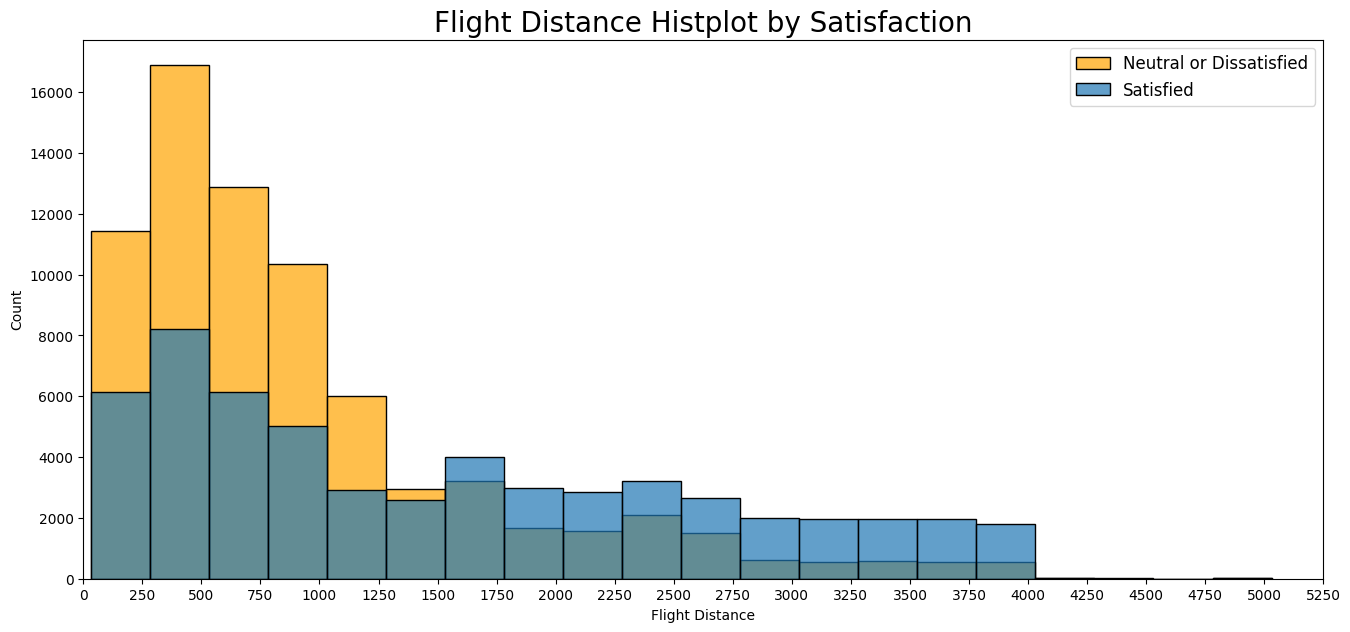

In [43]:
# ganti yang keren, benerin tabelnya

fig, ax = plt.subplots(figsize=(16,7))
sns.histplot(x=df_dis['Flight Distance'],bins=20, binwidth= 250,color='orange', alpha=.7, ax=ax)
sns.histplot(x=df_sat['Flight Distance'],bins=20, binwidth= 250, alpha=.7, ax=ax)
ax.set_title('Flight Distance Histplot by Satisfaction', fontsize= 20)
ax.set_xlim([0,5250])
plt.legend(['Neutral or Dissatisfied', 'Satisfied'], fontsize=12)
plt.xticks(range(0,5500,250))
plt.show

# tanpa alasan yang diketahui, xticks dan binnya miring

*Interpretasi Histogram*
- Dilihat dari persebarannya, kedua data diatas sama sama tidak berdistribusi normal
- Persebaran data kelompok `Neutral or Dissastisfied` lebih banyak di jarak 0 - 1500, sedangkan untuk jarak 1500 keatas, kelompok `satisfied` lebih banyak

### Uji Statistik : Metode Mann Whitney

*Asumsi Perbandingan*<br>
Ho : Rata - rata jarak tempuh pesawat antara penumpang yang `satisfied` dan `neutral or dissatisfied` sama<br>
Ha : Rata - rata jarak tempuh penumpang `satisfied` lebih besar dari penumpang `neutral or dissatisfied`

In [44]:
result_fd = mannwhitneyu(df_sat['Flight Distance'], df_dis['Flight Distance'], alternative= 'greater')
print('pvalue Flight Distance per satisfaction, sebesar {}'.format(result_fd[1]/2))


pvalue Flight Distance per satisfaction, sebesar 0.0


*Interpretasi metode Mann Whitney*<br>
pvalue > 0.05, menolak hipotesis Ho<br>
Rata - rata jarak tempuh penumpang `satisfied` lebih besar dari penumpang `neutral or dissatisfied`

### Kesimpulan
- Kelompok `Neutral or Dissastisfied` rata - rata memiliki `Flight Distance` lebih besar pada jarak 0 - 1500

---
---

## **Kolom `Departure Delay in Minutes`**
Mencari Hubungan antara `Departure Delay in Minutes` dengan `satisfaction`

Pendekatan:
- Data akan dibagi 2 berdasarkan kelompok `satisfaction`
- Kedua data akan diperbandingkan dengan grafik ataupun metode statistika

---

### Describe

In [45]:
# Describe Data `Departure Delay in Minutes` ketika `satisfied`

df_sat['Departure Delay in Minutes'].describe()

count    56428.000000
mean        12.509782
std         35.010480
min          0.000000
25%          0.000000
50%          0.000000
75%          9.000000
max       1305.000000
Name: Departure Delay in Minutes, dtype: float64

In [46]:
# Describe Data `Departure Delay in Minutes` ketika `neutral or dissatisfied`

df_dis['Departure Delay in Minutes'].describe()

count    73452.000000
mean        16.406837
std         40.182914
min          0.000000
25%          0.000000
50%          0.000000
75%         15.000000
max       1592.000000
Name: Departure Delay in Minutes, dtype: float64

*Interpretasi Describe*
- Jumlah data `netural or dissatisfied` lebih banyak (14573)
- Kebanyakan Data `Departure Delay in Minutes` bernilai 0
- Nilai `Departure Delay in Minutes` ketika `netural or dissatisfied` cenderung lebih besar

### Histogram

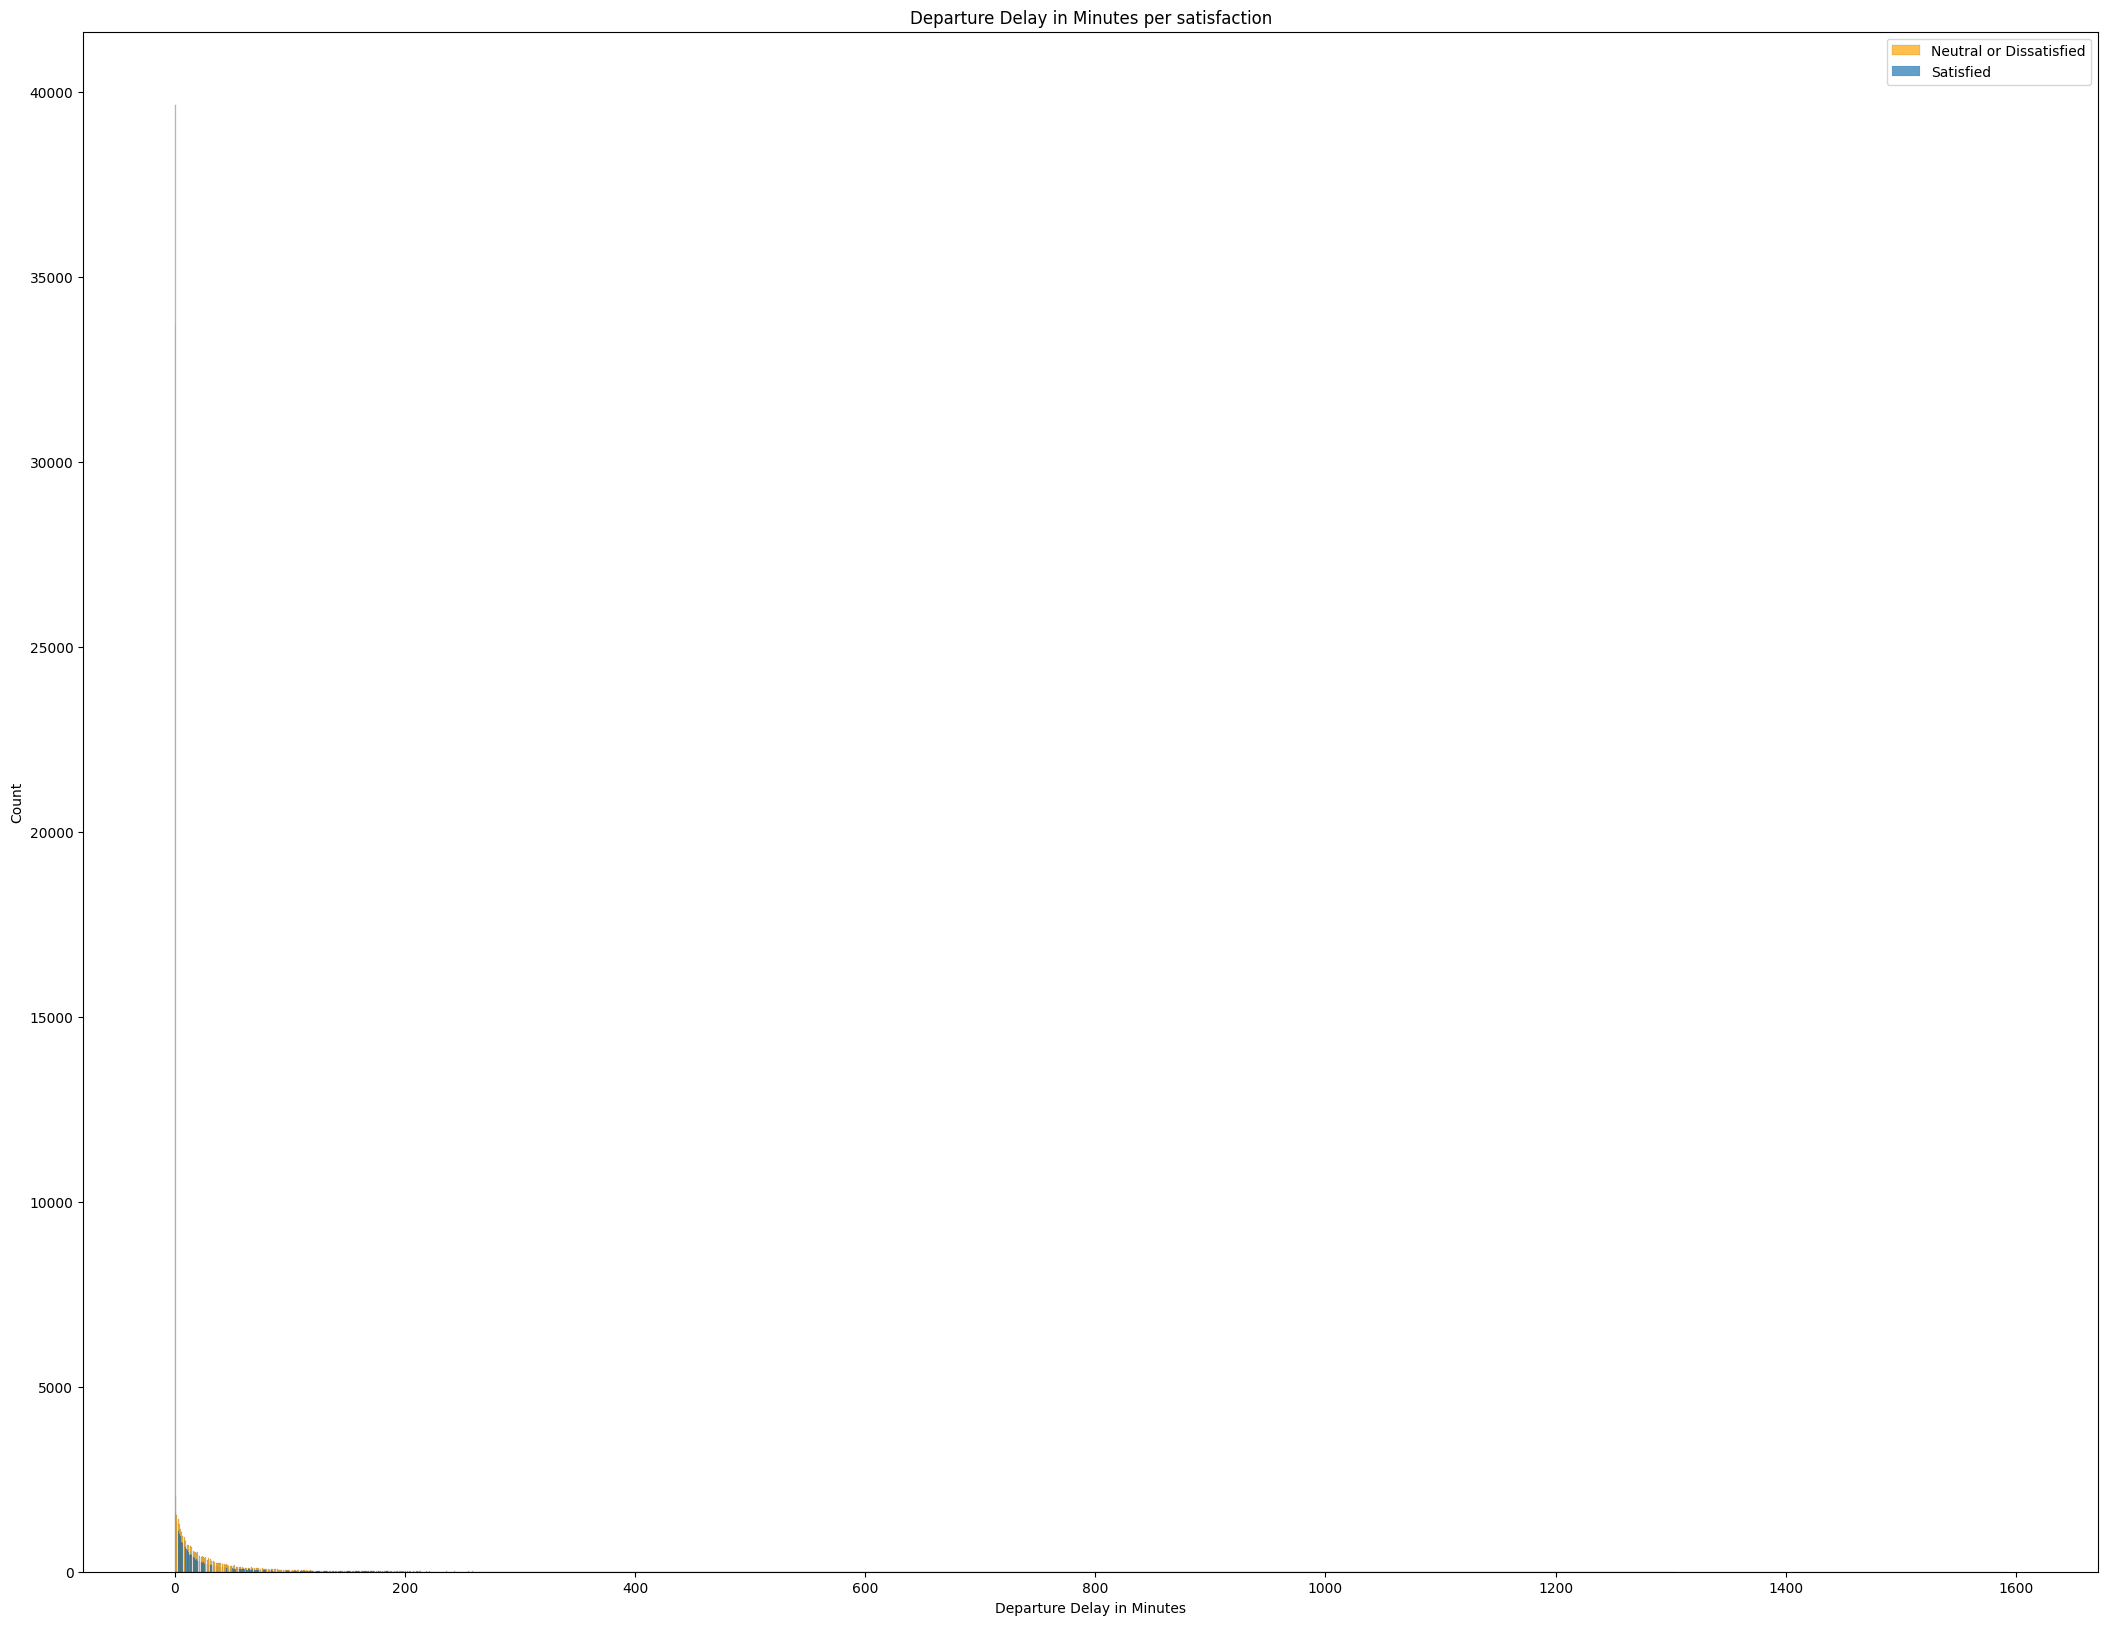

In [47]:
# Melihat Persebaran data menggunakan Histogram

plt.figure(figsize=(26,20))
sns.histplot(x=df_dis['Departure Delay in Minutes'],color='orange', alpha=0.7)
sns.histplot(x=df_sat['Departure Delay in Minutes'], alpha=0.7).set_title('Departure Delay in Minutes per satisfaction')
plt.legend(['Neutral or Dissatisfied', 'Satisfied'])

*Interpretasi Histogram*
- Data sulit diinterpretasi menggunakan Histogram
- Nilai data lebih banyak yang 0
- Data tidak terdistribusi normal

### Boxplot
Dikarenakan menggunakan histogram sulit untuk dilihat, maka akan dicoba menggunakan boxplot

Text(0.5, 1.0, 'Departure Delay in Minutes when neutral or dissatisfied')

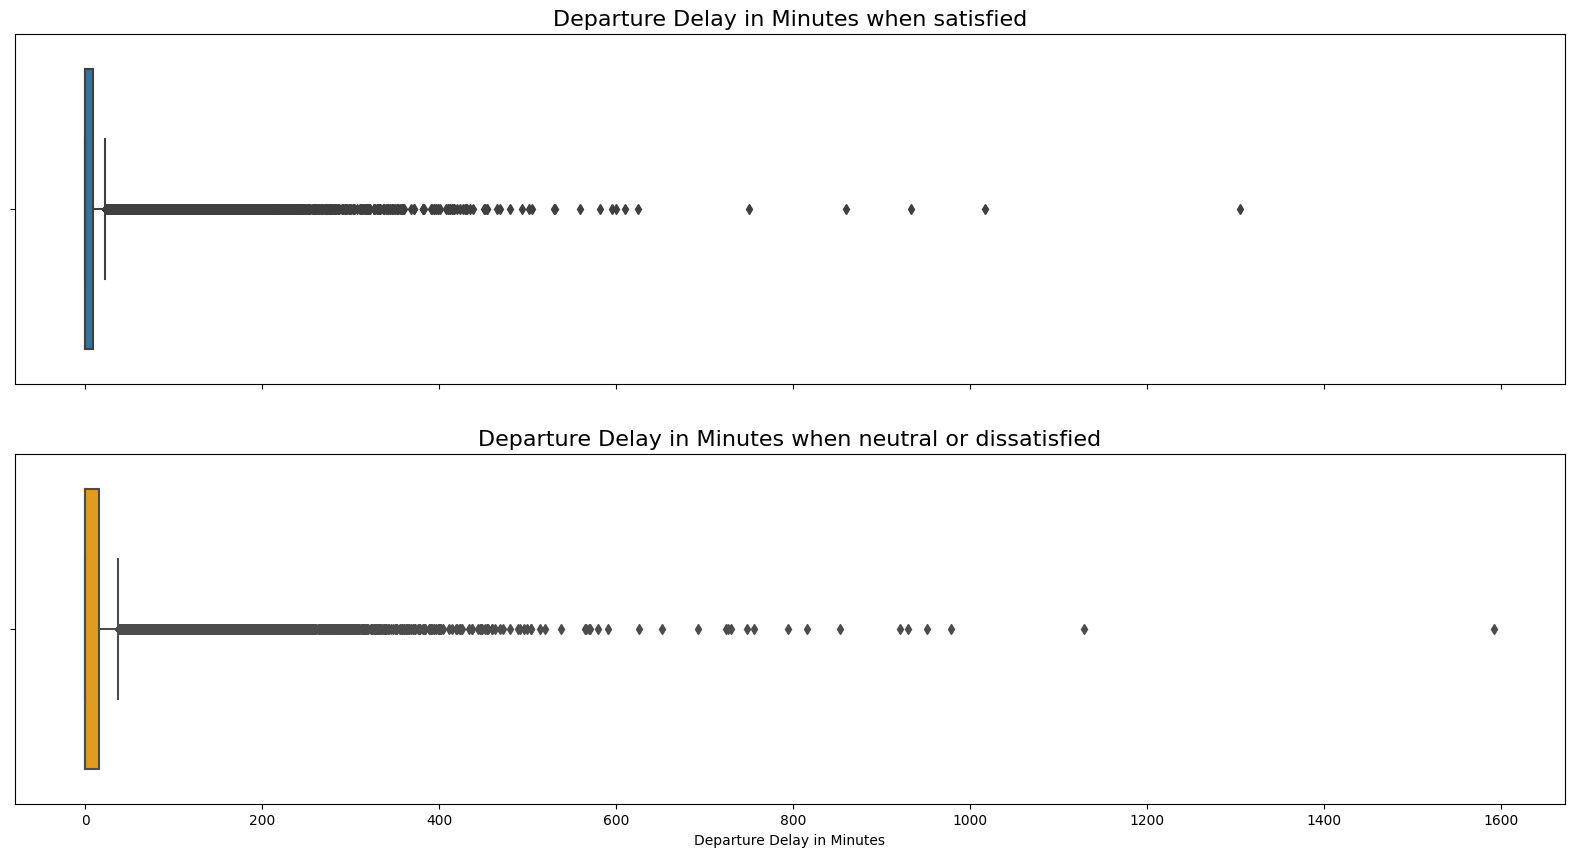

In [48]:
# Boxplot `Departure Delay in Minutes` lebih dari 0 menit untuk semua kelompok `satisfaction`

fig, (ax1,ax2) = plt.subplots(2, sharex=True, figsize=(20,10))
sns.boxplot(x=df_sat['Departure Delay in Minutes'], ax=ax1).set_title('Departure Delay in Minutes when satisfied', fontsize=16)
ax1.set_xlabel('')
sns.boxplot(x=df_dis['Departure Delay in Minutes'],ax=ax2, color='orange').set_title('Departure Delay in Minutes when neutral or dissatisfied', fontsize = 16)

*Interpretasi Boxplot*
- Median kedua data terdapat pada nilai 0, maka nilai 0 dikedua data sangat besar
- Kelompok `Neutral or Dissatisfied` memiliki nilai outlier yang jauh lebih besar

### Uji Statistik : Metode Mann Whitney

*Asumsi*<br>
Ho : Rata - rata waktu keterlambatan saat berangkat kelompok `satisfied` *sama dengan* rata - rata waktu keterlambatan kelompok `neutral or dissatisfied`<br>
Ha : Rata - rata waktu keterlambatan saat berangkat kelompok `satisfied` **lebih kecil dari** dengan rata - rata waktu keterlambatan kelompok `neutral or dissatisfied`

In [49]:
# Perbandingan Mann Whitney antara Kolom `Departure Delay in Minutes` ketika `satisfied` dan `dissatisfied`

result_dd = mannwhitneyu(df_sat['Departure Delay in Minutes'], df_dis['Departure Delay in Minutes'], alternative='less')
print(f'Pvalue metode mann whitney untuk kolom Age adalah {result_dd[1]/2}')

Pvalue metode mann whitney untuk kolom Age adalah 7.754571666878501e-137


*Interpretasi Metode Mann-Whitney*<br>
Jika pvalue <= 0.05, maka asumsi Ho ditolak<br>
Rata - rata waktu keterlambatan saat berangkat kelompok `satisfied` **lebih kecil dari** dengan rata - rata waktu keterlambatan kelompok `neutral or dissatisfied`

---

Data akan dianalisa lebih lanjut, dengan mengeluarkan nilai 0 dari data `Departure Delay in Minutes`

## Analisa Lanjutan `Departure Delay in Minutes`
Dikarenakan data memiliki banyak nilai 0 (tidak terlambat), maka akan dicoba untuk menganalisa data yang telat saja (>0)

In [50]:
# Dataframe ketika `Departure Delay in Minutes` lebih dari 0 menit

df_sat_dd = df_sat[df_sat['Departure Delay in Minutes']!=0]
df_dis_dd = df_dis[df_dis['Departure Delay in Minutes']!=0]

In [51]:
print('Jumlah data kedatangan terlambat pada penumpang satisfied : {}'.format(len(df_sat_dd)))
print('Jumlah data yang TIDAK terlambat pada penumpang satisfied : {}'.format(len(df_sat) -len(df_sat_dd)))

print('Jumlah data kedatangan terlambat pada penumpang neutral or dissatisfied : {}'.format(len(df_dis_dd)))
print('Jumlah data yang TIDAK terlambat pada penumpang neutral or dissatisfied : {}'.format(len(df_dis)-len(df_dis_dd)))

Jumlah data kedatangan terlambat pada penumpang satisfied : 22729
Jumlah data yang TIDAK terlambat pada penumpang satisfied : 33699
Jumlah data kedatangan terlambat pada penumpang neutral or dissatisfied : 33795
Jumlah data yang TIDAK terlambat pada penumpang neutral or dissatisfied : 39657


### Histogram

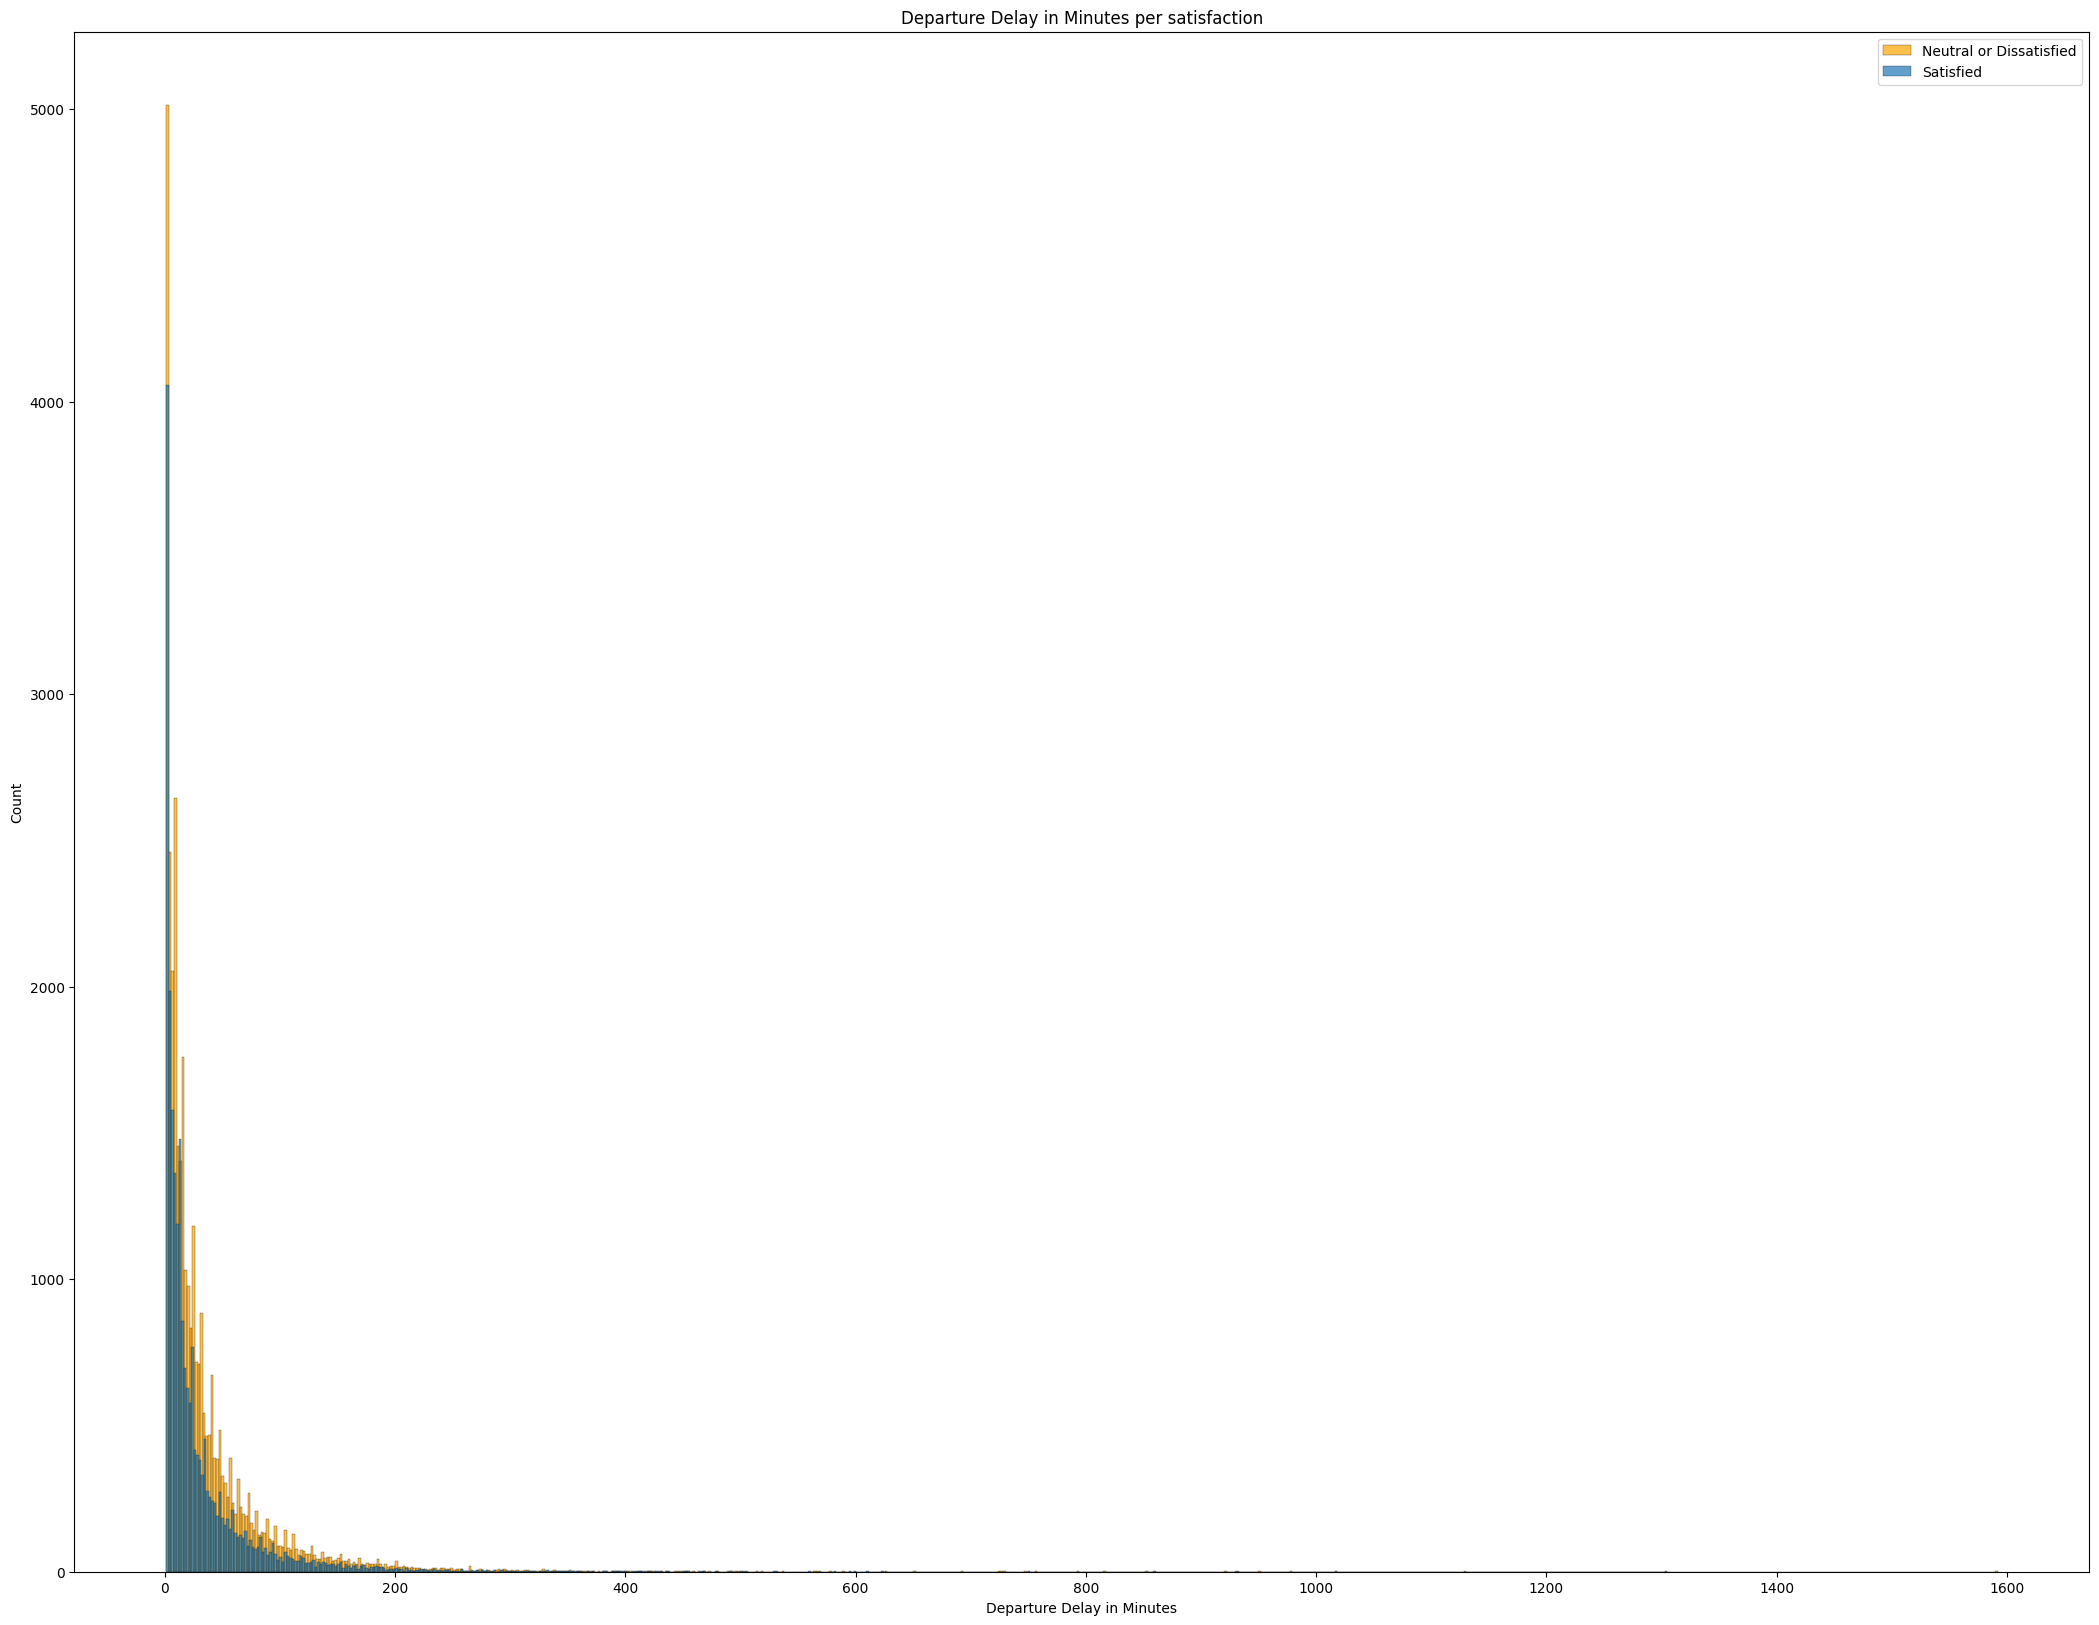

In [52]:
plt.figure(figsize=(26,20))
sns.histplot(x=df_dis_dd['Departure Delay in Minutes'],color='orange', alpha=0.7)
sns.histplot(x=df_sat_dd['Departure Delay in Minutes'], alpha=0.7).set_title('Departure Delay in Minutes per satisfaction')
plt.legend(['Neutral or Dissatisfied', 'Satisfied'])

*Interpretasi Histogram*
- Data 'neutral or dissatisfied` memiliki jumlah lebih banyak secara keseluruhan
- Data Masih jauh skew ke kanan

### Uji Statistik : Metode Mann Whitney

*Asumsi Perbandingan*<br>
Ho : Rata - rata waktu keterlambatan kelompok `satisfied` *sama dengan* rata - rata waktu keterlambatan kelompok `neutral or dissatisfied`<br>
Ha : Rata - rata waktu keterlambatan kelompok `satisfied` **lebih kecil** dari rata - rata waktu keterlambatan kelompok `neutral or dissatisfied`

In [53]:
# Perbandingan Menggunakan Mann Whitneyu

result_ddm = mannwhitneyu(df_sat_dd['Departure Delay in Minutes'], df_dis_dd['Departure Delay in Minutes'], alternative='less')
print(f'Pvalue metode mann whitney untuk kolom Age adalah {result_ddm[1]/2}')

Pvalue metode mann whitney untuk kolom Age adalah 8.552457042687739e-64


*Interpretasi Metode Mann Whitney*<br>
Jika pvalue <= 0.05, maka asumsi Ho ditolak<br>
Maka Rata - rata waktu keterlambatan kelompok `satisfied` **lebih kecil** dari rata - rata waktu keterlambatan kelompok `neutral or dissatisfied`

### **Kesimpulan**
- Rata - rata waktu `Departure Delay in Minutes` kelompok `neutral or dissatisfied` lebih kecil dari kelompok satisfied, terlepas dari terlambat (waktu>0) atau tidak (waktu=0)

---
---

## **Kolom `Arrival Delay in Minutes`**
Mencari Hubungan antara `Arrival Delay in Minutes` dengan `satisfaction`

Pendekatan:
- Data akan dibagi 2 berdasarkan kelompok `satisfaction`
- Kedua data akan diperbandingkan dengan grafik ataupun metode statistika

---

### Describe

In [54]:
# Describe Data `Departure Delay in Minutes` ketika `satisfied`

df_sat['Arrival Delay in Minutes'].describe()

count    56428.000000
mean        12.541114
std         35.397571
min          0.000000
25%          0.000000
50%          0.000000
75%          9.000000
max       1280.000000
Name: Arrival Delay in Minutes, dtype: float64

In [55]:
# Describe Data `Departure Delay in Minutes` ketika `neutral or dissatisfied`

df_dis['Arrival Delay in Minutes'].describe()

count    73452.000000
mean        17.058909
std         40.459390
min          0.000000
25%          0.000000
50%          0.000000
75%         17.000000
max       1584.000000
Name: Arrival Delay in Minutes, dtype: float64

*Interpretasi Describe*
- Data `Departure Delay in Minutes` dan `Arrival Delay in Minutes` pada tiap kategori `satisfaction` memiliki jumlah yang sama
- Jumlah data `netural or dissatisfied` lebih banyak (14573)
- Kebanyakan Data `Arrival Delay in Minutes` bernilai 0
- Nilai `Arrival Delay in Minutes` ketika `netural or dissatisfied` cenderung lebih besar

### Histogram

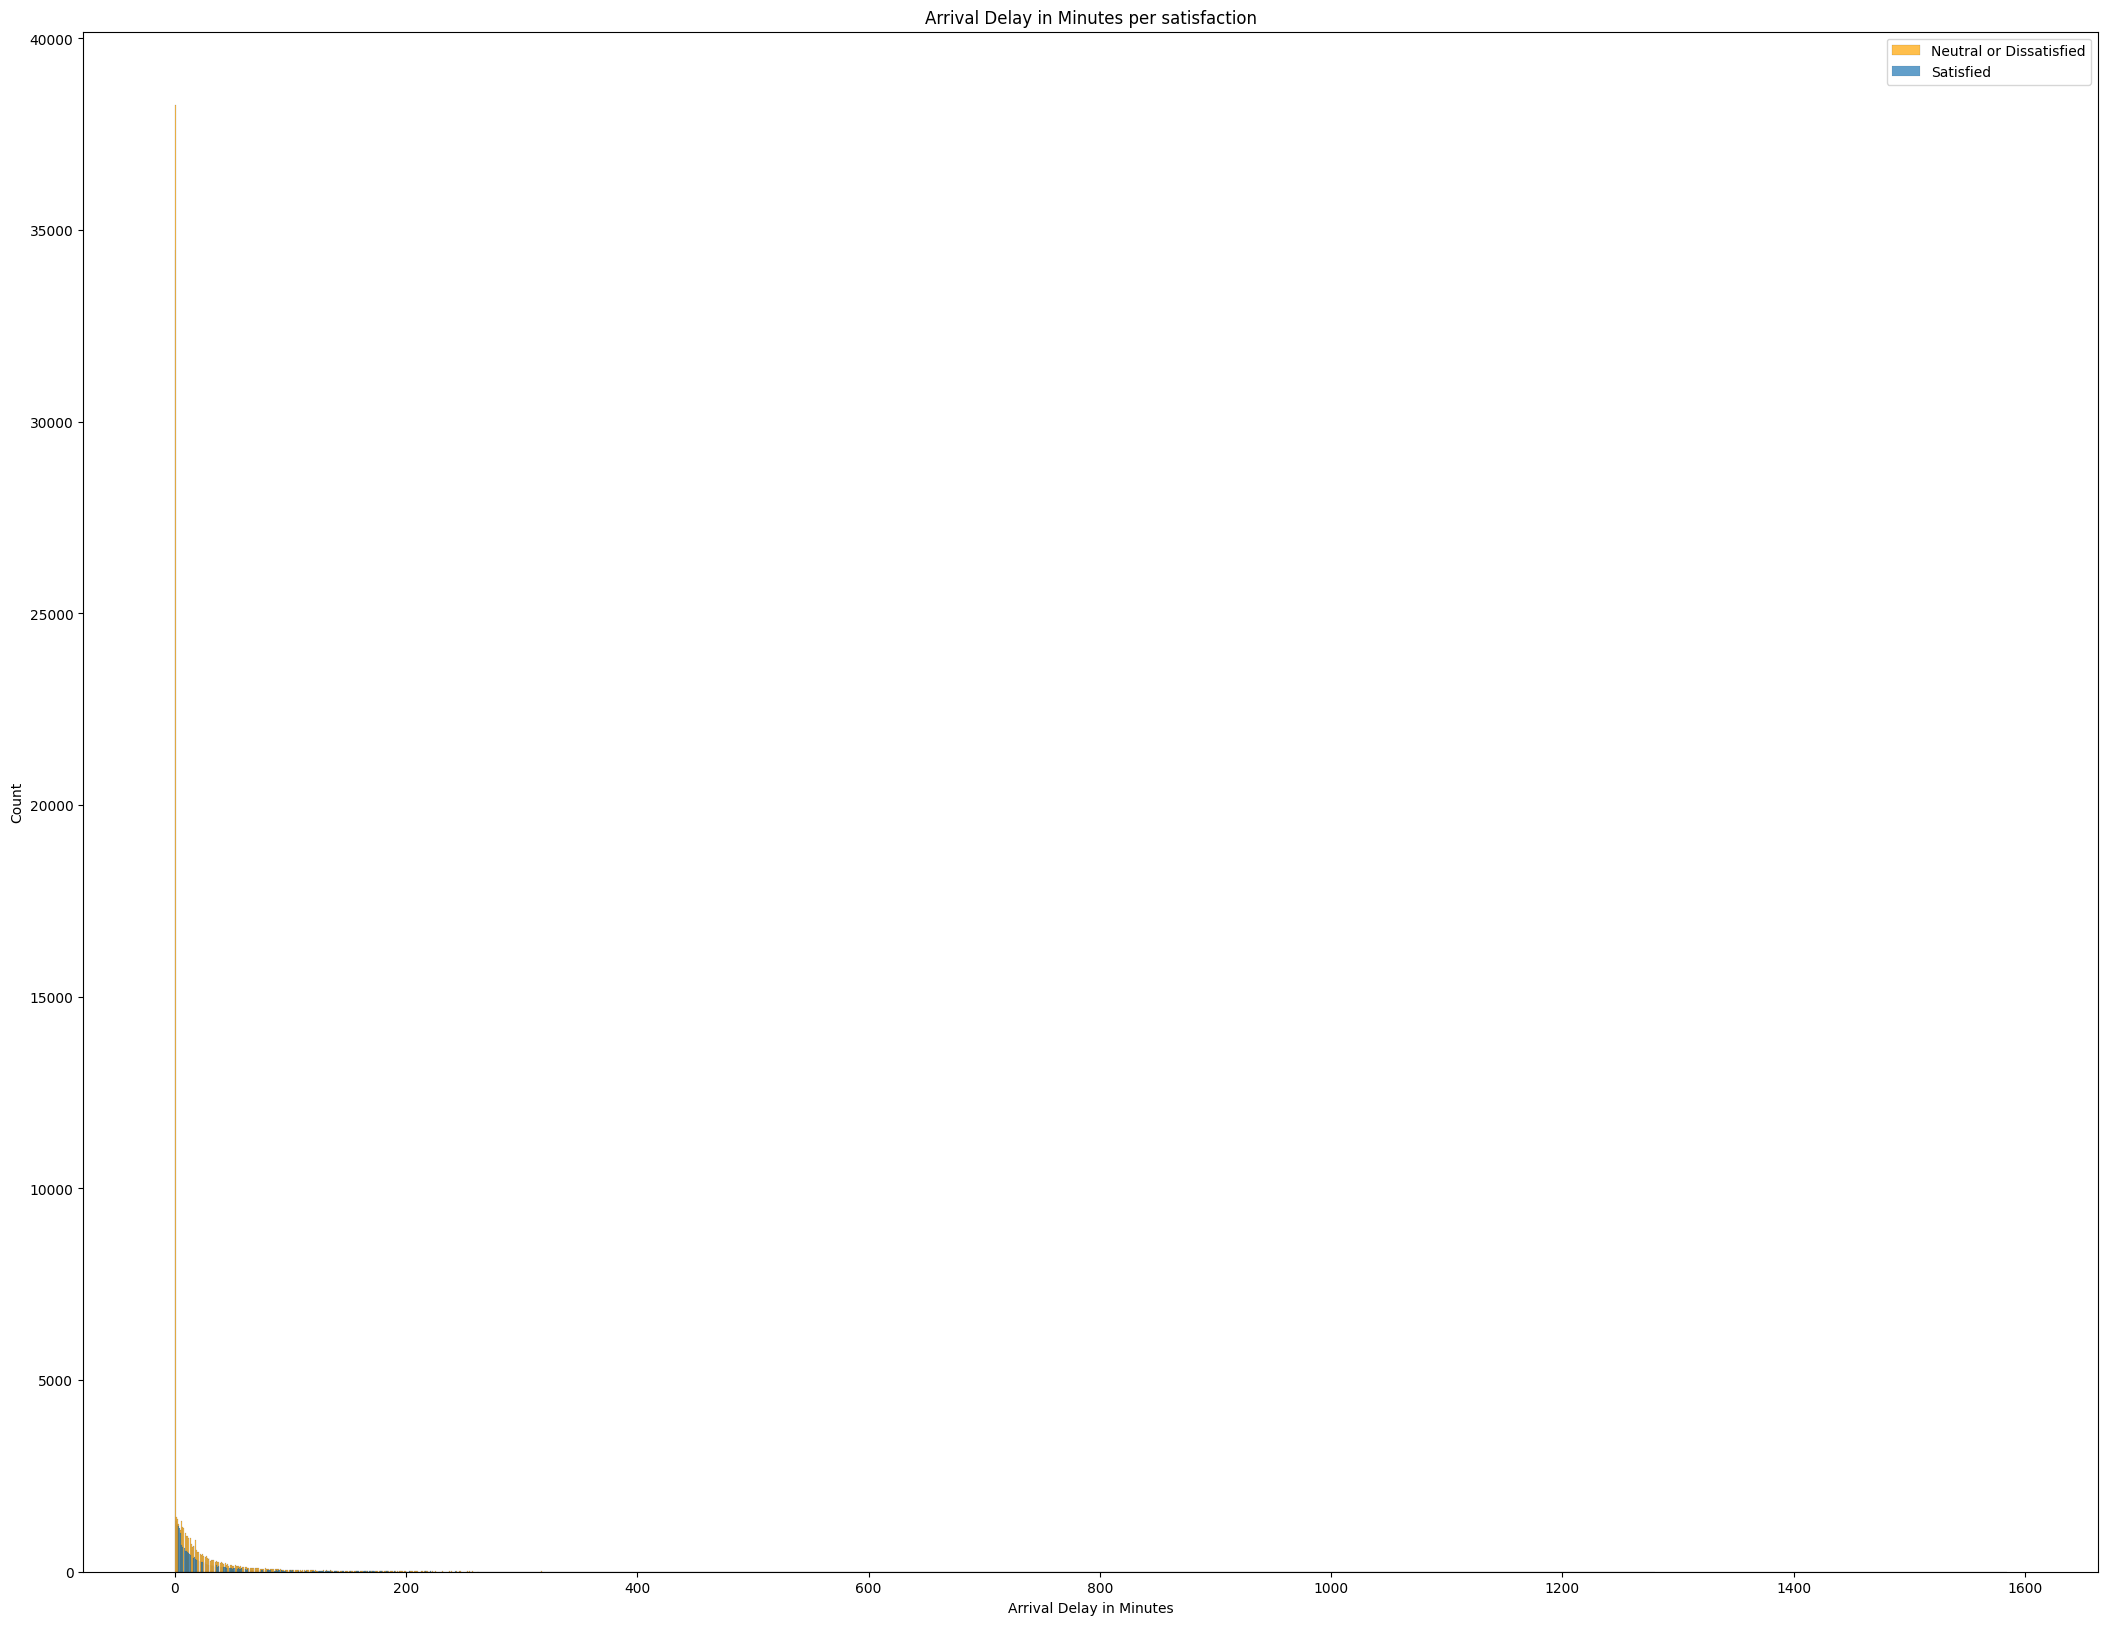

In [56]:
# Melihat Persebaran data menggunakan Histogram

plt.figure(figsize=(26,20))
sns.histplot(x=df_dis['Arrival Delay in Minutes'],color='orange', alpha=0.7)
sns.histplot(x=df_sat['Arrival Delay in Minutes'], alpha=0.7).set_title('Arrival Delay in Minutes per satisfaction')
plt.legend(['Neutral or Dissatisfied', 'Satisfied'])

*Interpretasi Histogram*
- Data sulit diinterpretasi menggunakan Histogram
- Nilai data lebih banyak yang 0
- Data tidak terdistribusi normal
- Akan dicoba menggunakan boxplot

### Boxplot

Text(0.5, 1.0, 'Arrival Delay in Minutes when neutral or dissatisfied')

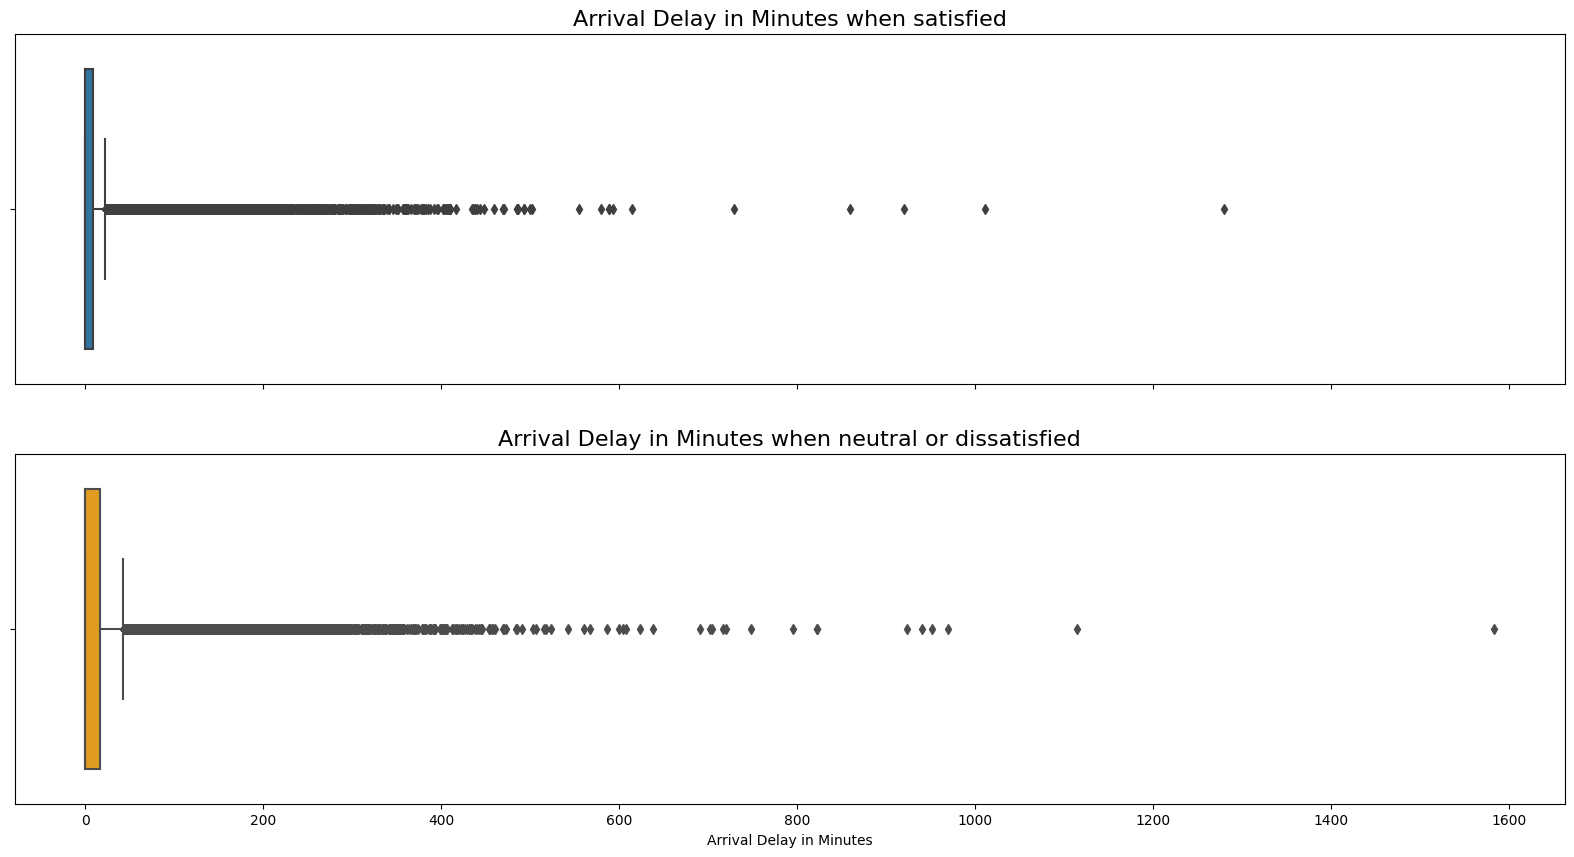

In [57]:
# Boxplot `Arrival Delay in Minutes` lebih dari 0 menit untuk semua kelompok `satisfaction`

fig, (ax1,ax2) = plt.subplots(2, sharex=True, figsize=(20,10))
sns.boxplot(x=df_sat['Arrival Delay in Minutes'], ax=ax1).set_title('Arrival Delay in Minutes when satisfied', fontsize=16)
ax1.set_xlabel('')
sns.boxplot(x=df_dis['Arrival Delay in Minutes'],ax=ax2, color='orange').set_title('Arrival Delay in Minutes when neutral or dissatisfied', fontsize = 16)

*Interpretasi Boxplot*
- Median kedua data terdapat pada nilai 0, maka nilai 0 dikedua data sangat besar
- Kelompok `Neutral or Dissatisfied` memiliki nilai outlier yang jauh lebih besar

### Uji Statistik : Metode Mann Whitney

*Asumsi*<br>
Ho : Rata - rata waktu keterlambatan saat kedatangan penumpang `satisfied` *sama dengan* rata - rata waktu keterlambatan penumpang `neutral or dissatisfied`<br>
Ha : Rata - rata waktu keterlambatan saat kedatangan penumpang `satisfied` **lebih kecil dari** dengan rata - rata waktu keterlambatan penumpang `neutral or dissatisfied`

In [58]:
# Perbandingan Mann Whitney antara Kolom `Arrival Delay in Minutes` ketika `satisfied` dan `dissatisfied`

result_ad = mannwhitneyu(df_sat['Arrival Delay in Minutes'], df_dis['Arrival Delay in Minutes'], alternative='less')
print(f'Pvalue metode mann whitney untuk kolom Age adalah {result_ad[1]/2}')

Pvalue metode mann whitney untuk kolom Age adalah 8.352215496506656e-288


*Interpretasi Metode Mann-Whitney*<br>
Jika pvalue <= 0.05, maka asumsi Ho ditolak<br>
Rata - rata waktu keterlambatan saat kedatangan penumpang `satisfied` **lebih kecil dari** dengan rata - rata waktu keterlambatan kelompok `neutral or dissatisfied`

## Analisa Lanjutan `Arrival Delay in Minutes`
Dikarenakan data memiliki banyak nilai 0 (tidak terlambat), maka akan dicoba untuk menganalisa data yang telat saja (>0)

In [59]:
# Dataframe ketika `Arrival Delay in Minutes` lebih dari 0 menit

df_sat_ad = df_sat[df_sat['Arrival Delay in Minutes']!=0]
df_dis_ad = df_dis[df_dis['Arrival Delay in Minutes']!=0]

In [60]:
print('Jumlah data kedatangan terlambat pada penumpang satisfied : {}'.format(len(df_sat_ad)))
print('Jumlah data yang TIDAK terlambat pada penumpang satisfied : {}'.format(len(df_sat) -len(df_sat_ad)))

print('Jumlah data kedatangan terlambat pada penumpang neutral or dissatisfied : {}'.format(len(df_dis_ad)))
print('Jumlah data yang TIDAK terlambat pada penumpang neutral or dissatisfied : {}'.format(len(df_dis)-len(df_dis_ad)))

Jumlah data kedatangan terlambat pada penumpang satisfied : 21938
Jumlah data yang TIDAK terlambat pada penumpang satisfied : 34490
Jumlah data kedatangan terlambat pada penumpang neutral or dissatisfied : 35189
Jumlah data yang TIDAK terlambat pada penumpang neutral or dissatisfied : 38263


### Histogram

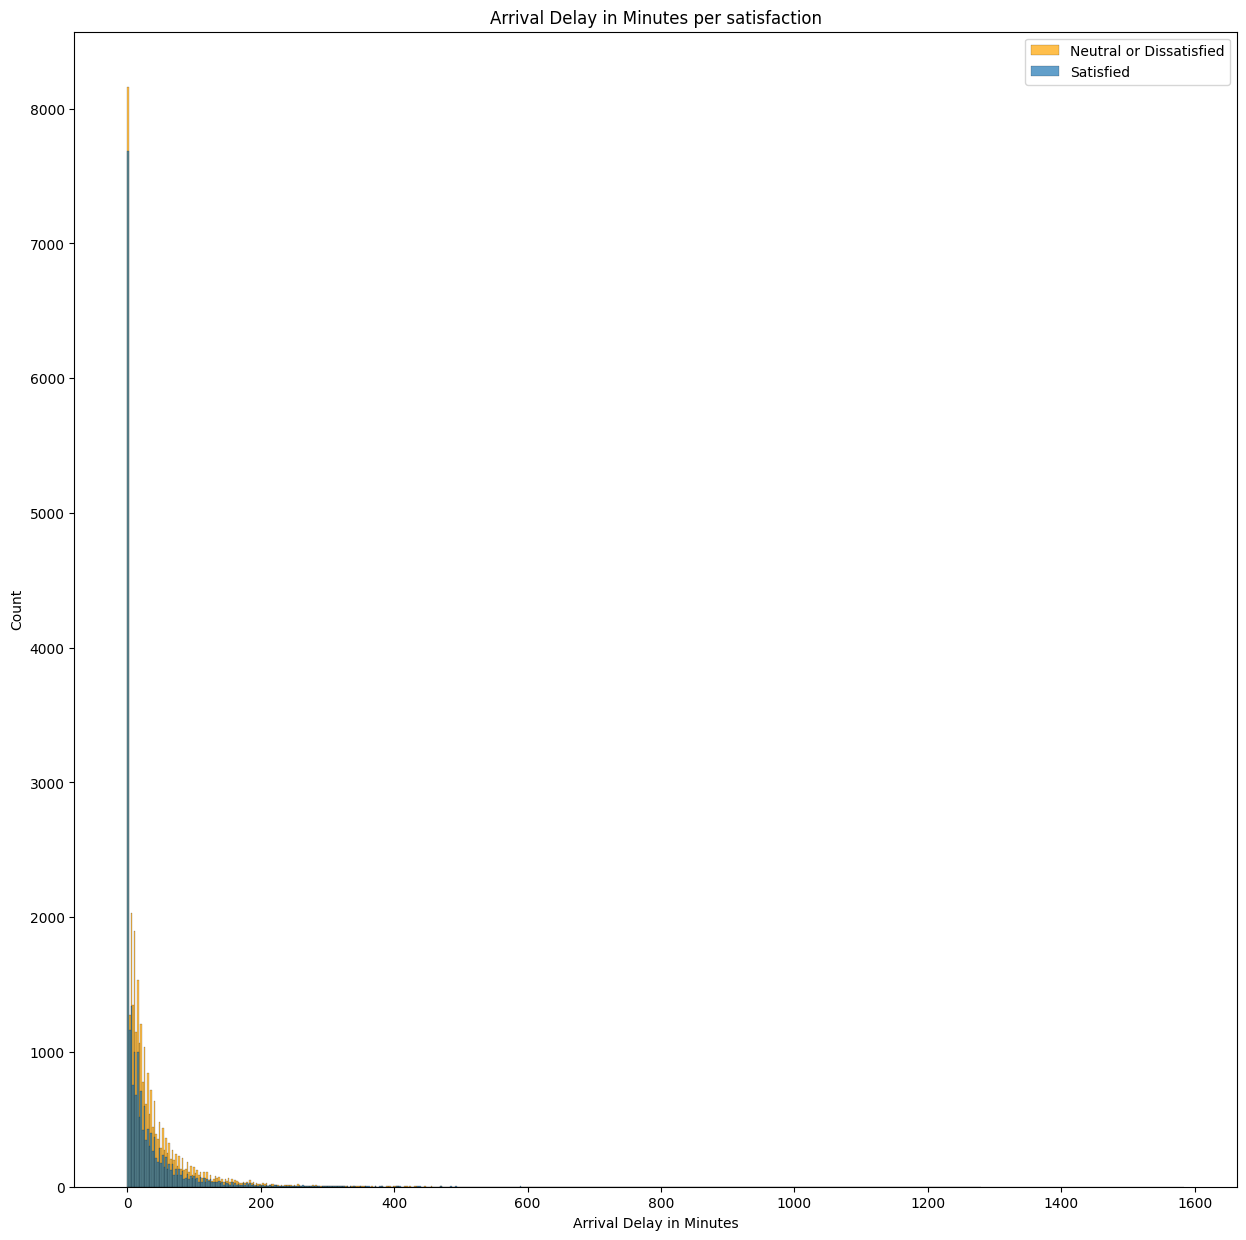

In [61]:
fig, ax = plt.subplots(figsize=(15,15))
sns.histplot(x=df_dis_dd['Arrival Delay in Minutes'], color='orange', alpha=0.7,ax=ax)
sns.histplot(x=df_sat_dd['Arrival Delay in Minutes'], alpha=0.7,ax=ax).set_title('Arrival Delay in Minutes per satisfaction')
plt.legend(['Neutral or Dissatisfied', 'Satisfied'])

*Interpretasi Histogram*
- Data 'neutral or dissatisfied` memiliki jumlah lebih banyak secara keseluruhan

### Uji Statistik : Metode Mann Whitney

*Asumsi*<br>
Ho : Rata - rata waktu keterlambatan kelompok `satisfied` *sama dengan* rata - rata waktu keterlambatan kelompok `neutral or dissatisfied`<br>
Ha : Rata - rata waktu keterlambatan kelompok `satisfied` **lebih kecil** dari rata - rata waktu keterlambatan kelompok `neutral or dissatisfied`

In [62]:
# Perbandingan Menggunakan Mann Whitneyu

result_adm = mannwhitneyu(df_sat_ad['Arrival Delay in Minutes'], df_dis_ad['Arrival Delay in Minutes'], alternative='less')
print(f'Pvalue metode mann whitney untuk kolom Age adalah {result_adm[1]/2}')

Pvalue metode mann whitney untuk kolom Age adalah 2.120341545889367e-67


*Interpretasi Metode Mann Whitney*<br>
Jika pvalue <= 0.05, maka asumsi Ho ditolak<br>
Maka Rata - rata waktu keterlambatan kelompok `satisfied` **lebih kecil** dari rata - rata waktu keterlambatan kelompok `neutral or dissatisfied`

### **Kesimpulan**
- Rata - rata waktu `Arrival Delay in Minutes` kelompok `neutral or dissatisfied` lebih kecil dari kelompok satisfied, terlepas dari terlambat (waktu>0) atau tidak (waktu=0)
-

---
---

## **Kolom `Gender`**
Mencari Hubungan antara `Gender` dengan `satisfaction`

Pendekatan:
- Data akan dibagi 2 berdasarkan kelompok `satisfaction`
- Kedua data akan diperbandingkan dengan grafik ataupun metode statistika


---

### Countplot

In [63]:
# Membuat DataFrame untuk membuat countplot

df_gender = df[['Gender','satisfaction']]
df_gender['satisfaction'] = [1 if x == 'satisfied' else 0 for x in df['satisfaction']] # Mengubah nilai `satisfaction` menjadi 1 dan nilai `neutral or dissatisfaction` menjadi 0
df_gender

C:\Users\Shendy\AppData\Local\Temp\ipykernel_25432\204329785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender['satisfaction'] = [1 if x == 'satisfied' else 0 for x in df['satisfaction']] # Mengubah nilai `satisfaction` menjadi 1 dan nilai `neutral or dissatisfaction` menjadi 0


,Gender,satisfaction
0,Male,0
1,Male,0
2,Female,1
3,Female,0
4,Male,1
...,...,...
129875,Male,0
129876,Male,1
129877,Female,0
129878,Male,1


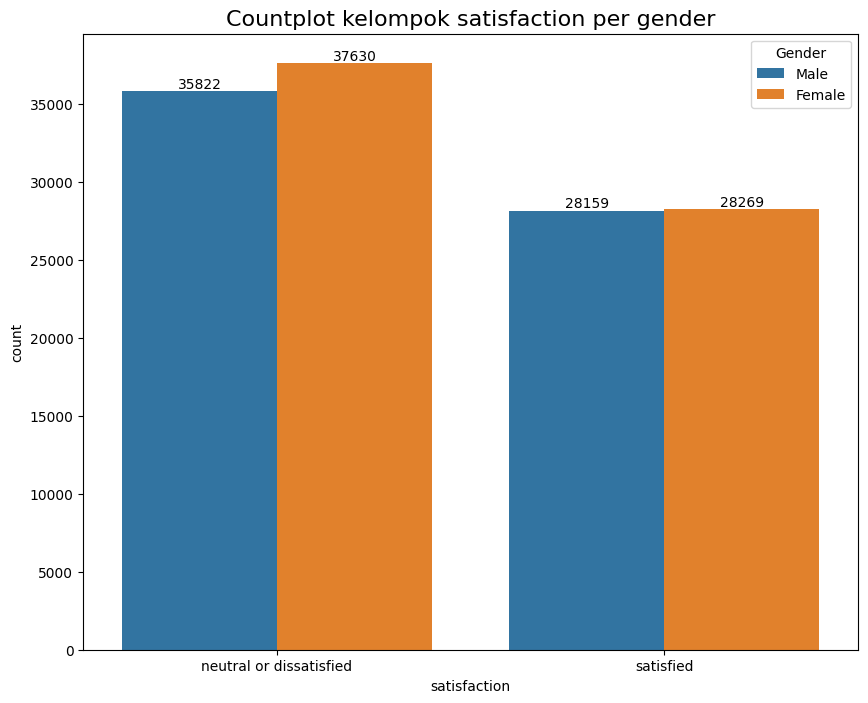

In [64]:
# Countplot kelompok satisfaction per gender

plt.figure(figsize=(10,8))
ax = sns.countplot(data= df_gender, x='satisfaction', hue='Gender')
ax.set_xticklabels(labels=['neutral or dissatisfied', 'satisfied'])
plt.title('Countplot kelompok satisfaction per gender', fontsize=16)

for i in ax.containers:
    ax.bar_label(i,)

*Interpretasi Countplot*
- Jumlah data pada kelompok `neutral or dissatisfied` lebih banyak
- Perbedaan gender antar 2 kelompok tidak terlalu besar
- Akan digunakan uji statistik apakah ada `satisfaction` dependen terhadap`gender`

### Uji Statistik : Metode Chi Squared


In [65]:
# DataFrame untuk uji statistik, membuat crosstab

df_gender_stat = pd.crosstab(index=df['Gender'], columns=df['satisfaction'])
df_gender_stat

satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,37630,28269
Male,35822,28159


Asumsi<br>
Ho : `Gender` dan `satisfaction` merupakan variabel independen, tidak memiliki keterkaitan<br>
Ha : `Gender` dan `satisfaction` merupakan variabel dependen, `satisfaction` berkaitan dengan `Gender`


In [66]:
# Uji statistik menggunakan chi squared
result = chi2_contingency(df_gender_stat)
print(f'pvalue dari uji chi squared adalah {result[1]}')

pvalue dari uji chi squared adalah 5.259838493340003e-05


*Interpretasi Metode Chi Squared*<br>
Jika pvalue > 0.05, maka asumsi Ho diterima<br>
Maka: `Gender` dan `satisfaction` merupakan variabel independen, tidak memiliki keterkaitan

### **Kesimpulan**
- Data `Gender` independen terhadap data `satisfaction`, data tidak memiliki keterkaitan

---
---

## **Kolom `Customer Type`**
Mencari Hubungan antara `Customer Type` dengan `satisfaction`

Pendekatan:
- Data akan dibagi 2 berdasarkan kelompok `satisfaction`
- Kedua data akan diperbandingkan dengan grafik ataupun metode statistika

---

### Countplot

In [67]:
df_ct = df[['Customer Type', 'satisfaction']]
df_ct['satisfaction'] = [1 if x == 'satisfied' else 0 for x in df['satisfaction']] # Mengubah nilai `satisfaction` menjadi 1 dan nilai `neutral or dissatisfaction` menjadi 0
df_ct.head()

C:\Users\Shendy\AppData\Local\Temp\ipykernel_25432\1379116950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ct['satisfaction'] = [1 if x == 'satisfied' else 0 for x in df['satisfaction']] # Mengubah nilai `satisfaction` menjadi 1 dan nilai `neutral or dissatisfaction` menjadi 0


,Customer Type,satisfaction
0,Loyal Customer,0
1,disloyal Customer,0
2,Loyal Customer,1
3,Loyal Customer,0
4,Loyal Customer,1


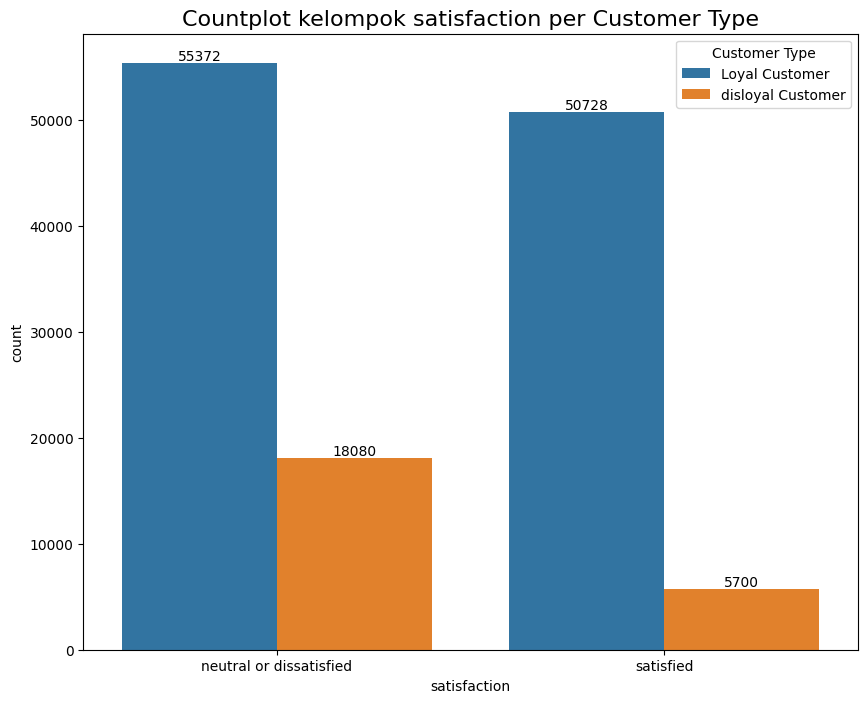

In [68]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data= df_ct, x='satisfaction', hue='Customer Type')
ax.set_xticklabels(labels=['neutral or dissatisfied', 'satisfied'])
plt.title('Countplot kelompok satisfaction per Customer Type', fontsize=16)

for i in ax.containers:
    ax.bar_label(i,)

*Interpretasi Countplot*
- `Loyal Customer` jauh lebih banyak daripada `disloyal Customer`
- Jumlah `Loyal Customer` pada kedua kelompok `satisfaction` tidak berbeda jauh
- Akan digunakan uji statistik untuk mengetahui `Customer Type` berhubungan dengan `satisfaction`

### Uji Statistik : Chi Squared


In [69]:
# DataFrame untuk uji statistik, membuat crosstab

df_customertype_stat = pd.crosstab(index=df['Customer Type'], columns=df['satisfaction'])
df_customertype_stat

satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,55372,50728
disloyal Customer,18080,5700


*Asumsi*<br>
Ho : `Customer Type` dan `satisfaction` merupakan variabel independen, tidak memiliki keterkaitan<br>
Ha : `Customer Type` dan `satisfaction` merupakan variabel dependen, `Customer Type` berkaitan dengan `satisfaction`

In [70]:
# Uji statistik menggunakan chi squared

result = chi2_contingency(df_customertype_stat)
print(f'pvalue dari uji chi squared adalah {result[1]}')

pvalue dari uji chi squared adalah 0.0


*Interpretasi*<br>
Jika pvalue <= 0.05, maka asumsi Ho ditolak<br>
Maka: `Customer Type` dan `satisfaction` merupakan variabel dependen, `Customer Type` berkaitan dengan `satisfaction`

### **Kesimpulan**
- Data `Customer Type` berkaitan atau dependen terhadap data `satisfaction`
- `Disloyal Customer` memiliki distribusi data yang besar pada kelompok `neutral or dissatisfied`

---
---

## **Kolom `Type of Travel`**
Mencari Hubungan antara `Type of Travel` dengan `satisfaction`

Pendekatan:
- Data akan dibagi 2 berdasarkan kelompok `satisfaction`
- Kedua data akan diperbandingkan dengan grafik ataupun metode statistika

---

### Countplot

In [71]:
# Dataframe untuk countplot

df_tt = df[['Type of Travel', 'satisfaction']]
df_tt['satisfaction'] = [1 if x == 'satisfied' else 0 for x in df['satisfaction']]
df_tt.head()

C:\Users\Shendy\AppData\Local\Temp\ipykernel_25432\2965385780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tt['satisfaction'] = [1 if x == 'satisfied' else 0 for x in df['satisfaction']]


,Type of Travel,satisfaction
0,Personal Travel,0
1,Business travel,0
2,Business travel,1
3,Business travel,0
4,Business travel,1


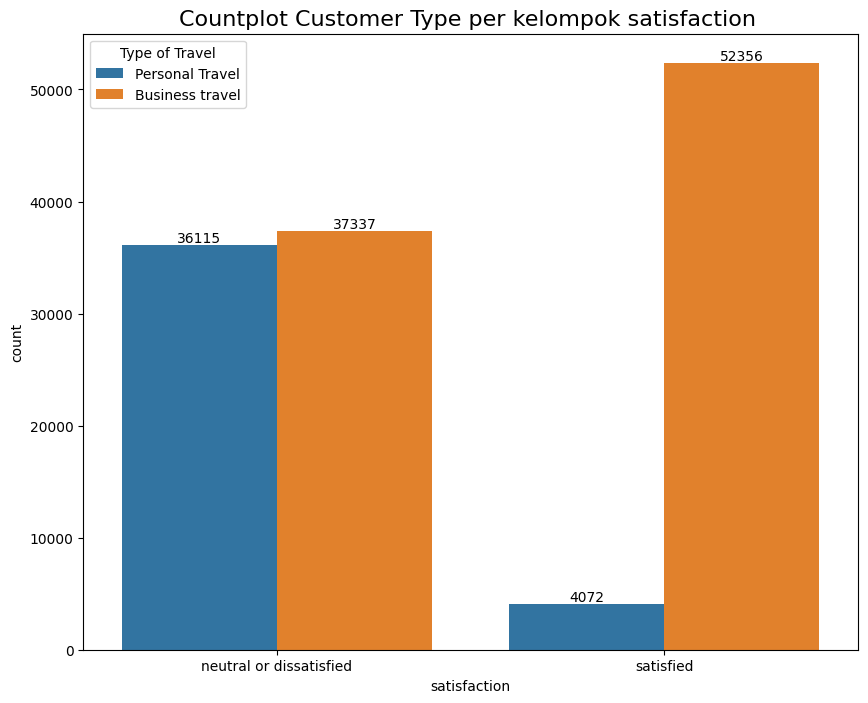

In [72]:
# Countplot Customer Type per kelompok satisfaction

plt.figure(figsize=(10,8))
ax=sns.countplot(data= df_tt, x='satisfaction', hue='Type of Travel')
ax.set_xticklabels(labels=['neutral or dissatisfied', 'satisfied'])
plt.title('Countplot Customer Type per kelompok satisfaction ', fontsize=16)

for i in ax.containers:
    ax.bar_label(i,)


*Interpretasi Countplot*<br>
- Jumlah `Bussiness travel` lebih banyak pada kolom `satisfied`
- Pada kelompok `neutral or dissatisfied`, kedua `Type of Travel` hampir sama
- Akan digunakan uji statistik untuk mengetahui `Type of Travel` berhubungan dengan `satisfaction`

### Uji Statistik : Chi Squared


In [73]:
# DataFrame untuk uji statistik, membuat crosstab

df_typeoftravel_stat = pd.crosstab(index=df['Type of Travel'], columns=df['satisfaction'])
df_typeoftravel_stat

satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,37337,52356
Personal Travel,36115,4072


*Asumsi*<br>
Ho : `Type of Travel` dan `satisfaction` merupakan variabel independen, tidak memiliki keterkaitan<br>
Ha : `Type of Travel` dan `satisfaction` merupakan variabel dependen, `Type of Travel` berkaitan dengan `satisfaction`

In [74]:
# Uji statistik menggunakan chi squared

result = chi2_contingency(df_typeoftravel_stat)
print(f'pvalue dari uji chi squared adalah {result[1]}')

pvalue dari uji chi squared adalah 0.0


*Interpretasi*<br>
Jika pvalue <= 0.05, maka asumsi Ho ditolak<br>
Maka: `Type of Travel` dan `satisfaction` merupakan variabel dependen, `Type of Travel` berkaitan dengan `satisfaction`

### *Kesimpulan*
- Data `Type of Travel` berkaitan atau dependen terhadap data `satisfaction`
- Tipe penerbangan `Personal Travel` memiliki persebaran data yang tinggi pada grup `neutral or dissatisfied`

---
---

## **Kolom `Class`**
Mencari Hubungan antara `Class` dengan `satisfaction`

Pendekatan:
- Data akan dibagi 2 berdasarkan kelompok `satisfaction`
- Kedua data akan diperbandingkan dengan grafik ataupun metode statistika

---

### Countplot

In [75]:
df_class = df[['Class', 'satisfaction']]
df_class['satisfaction'] = [1 if x == 'satisfied' else 0 for x in df['satisfaction']]
df_class.head()

C:\Users\Shendy\AppData\Local\Temp\ipykernel_25432\615826900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class['satisfaction'] = [1 if x == 'satisfied' else 0 for x in df['satisfaction']]


,Class,satisfaction
0,Eco Plus,0
1,Business,0
2,Business,1
3,Business,0
4,Business,1


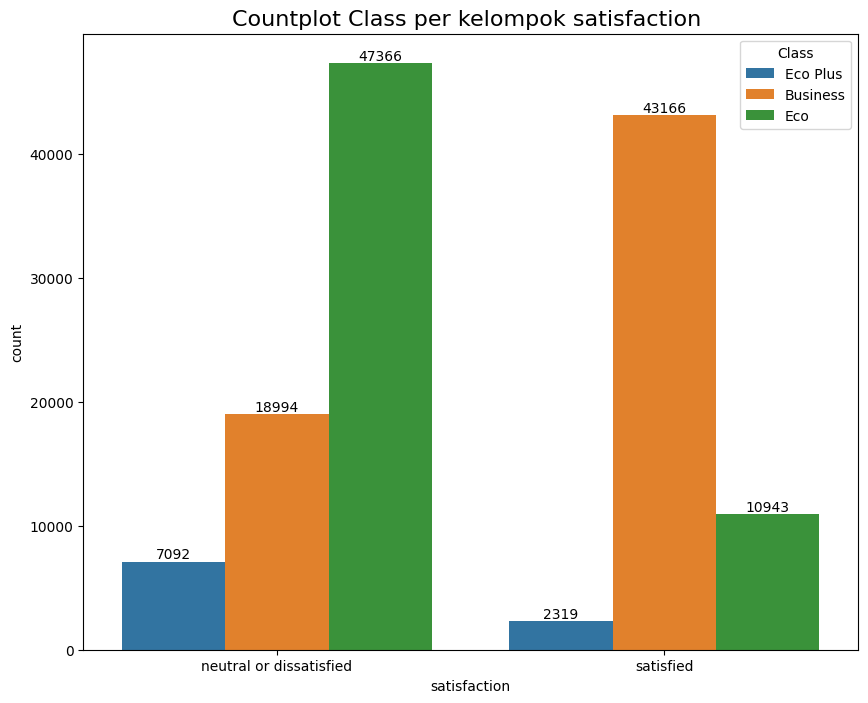

In [76]:
# Countplot Class per kelompok satisfaction

plt.figure(figsize=(10,8))
ax = sns.countplot(data= df_class, x='satisfaction', hue='Class')
ax.set_xticklabels(labels=['neutral or dissatisfied', 'satisfied'])
plt.title('Countplot Class per kelompok satisfaction ', fontsize=16)

for i in ax.containers:
    ax.bar_label(i,)

*Interpretasi Countplot*<br>
- Pada Kelompok `satisfied`, Jumlah `Business` paling besar
- Pada Kelompok `neutral or dissatisfied`, Jumlah `Eco` paling besar
- Jumlah `Eco Plus` lebih besar pada kelompok `neutral or dissatisfied` dibandingkan kelompok `satisfied`
- Akan digunakan uji statistik untuk mengetahui `Class` berhubungan dengan `satisfaction`

### Uji Statistik : Chi Squared

In [77]:
# DataFrame untuk uji statistik, membuat crosstab

df_class_stat = pd.crosstab(index=df['Class'], columns=df['satisfaction'])
df_class_stat

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,18994,43166
Eco,47366,10943
Eco Plus,7092,2319


Asumsi<br>
Ho : `class` dan `satisfaction` merupakan variabel independen, tidak memiliki keterkaitan<br>
Ha : `class` dan `satisfaction` merupakan variabel dependen, `class` berkaitan dengan `satisfaction`

In [78]:
# Uji statistik menggunakan chi squared

result = chi2_contingency(df_class_stat)
print(f'pvalue dari uji chi squared adalah {result[1]}')

pvalue dari uji chi squared adalah 0.0


*Interpretasi*<br>
Jika pvalue <= 0.05, maka asumsi Ho ditolak<br>
Maka: `Class` dan `satisfaction` merupakan variabel dependen, `Class` berkaitan dengan `satisfaction`

### **Kesimpulan**
- Data `Class` berkaitan atau dependen terhadap data `satisfaction`
- `Class` Eco memiliki persebaran data yang banyak pada kelompok `neutral or dissatisfied`

---
---

## **Kolom `Rating`**
Mencari Hubungan antara kolom - kolom rating kepuasan dengan `satisfaction`

Pendekatan:
- Data akan dibagi 2 berdasarkan kelompok `satisfaction`
- Kedua data akan diperbandingkan dengan grafik ataupun metode statistika
- Grafik yang akan dipakai untuk perbandingan adalah boxplot
---

### Boxplot

In [79]:
# Nama - nama kolom rating dalam bentuk list

rating_column

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [80]:
# DataFrame rating grup penumpang 'satisfied' dalam bentuk memanjang

df_rating_sat = df_sat.melt(var_name='service', value_vars=rating_column, value_name='rating')
df_rating_sat.head()

,service,rating
0,Inflight wifi service,2
1,Inflight wifi service,3
2,Inflight wifi service,4
3,Inflight wifi service,4
4,Inflight wifi service,3


In [81]:
# DataFrame rating grup penumpang 'neutral or dissatisfied' dalam bentuk memanjang

df_rating_dis = df_dis.melt(var_name='service', value_vars=rating_column, value_name='rating')
df_rating_dis.head()


,service,rating
0,Inflight wifi service,3
1,Inflight wifi service,3
2,Inflight wifi service,2
3,Inflight wifi service,3
4,Inflight wifi service,2


In [82]:
abis = ['ayam','goreng']
'\n'.join(abis)

'ayam\ngoreng'

In [83]:
rating_columns = [x.split(' ') for x in rating_column]
rating_columns = ['\n'.join(x) for x in rating_columns]
rating_columns

['Inflight\nwifi\nservice',
 'Departure/Arrival\ntime\nconvenient',
 'Ease\nof\nOnline\nbooking',
 'Gate\nlocation',
 'Food\nand\ndrink',
 'Online\nboarding',
 'Seat\ncomfort',
 'Inflight\nentertainment',
 'On-board\nservice',
 'Leg\nroom\nservice',
 'Baggage\nhandling',
 'Checkin\nservice',
 'Inflight\nservice',
 'Cleanliness']

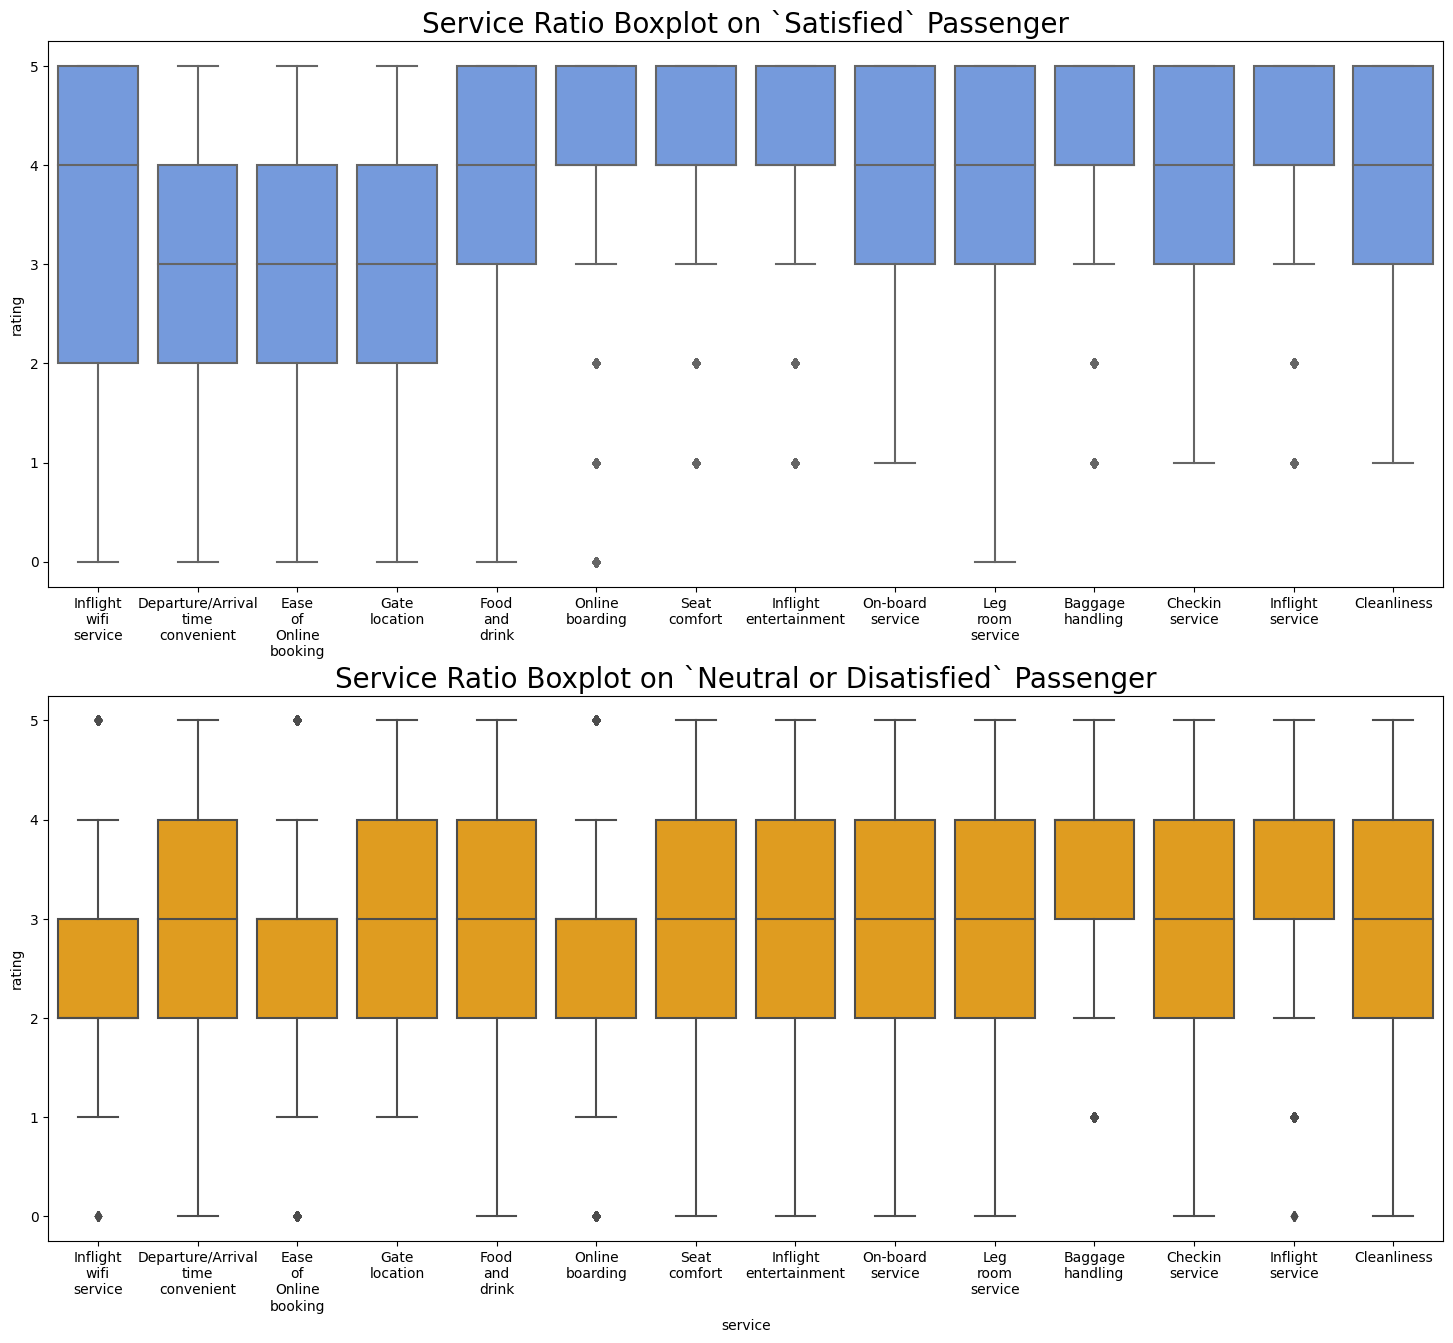

In [84]:
# Boxplot rating kepuasan per kelompok `satisfaction`

fig, (ax1, ax2) = plt.subplots(2, figsize=(18,12))

box1 =sns.boxplot(data=df_rating_sat, x='service', y='rating',ax=ax1, color='cornflowerblue')
box1.set_title('Service Ratio Boxplot on `Satisfied` Passenger', fontsize=20)
box1.set_xticklabels(rating_columns)
box1.set_xlabel('')

box2 = sns.boxplot(data=df_rating_dis, x='service', y='rating',ax=ax2, color='orange')
box2.set_title('Service Ratio Boxplot on `Neutral or Disatisfied` Passenger', fontsize=20)
box2.set_xticklabels(rating_columns)

plt.subplots_adjust(bottom=0.2, top=1.2)


*Interpretasi Boxplot*
- Rata - rata nilai rating pada penumpang `satisfied` lebih tinggi, kecuali pada `Departure/Arrival time convenient`, `Ease of Online booking` dan `Gate location`

### Normality Test

In [85]:
# Tes Normality pada setiap kolom rating

print('pvalue\t| Distribusi\t\t\t| Nama Kolom Rating\n')
for r in rating_column:
    stat, pvalue = normaltest(dftest[r])

    if pvalue >= 0.05 :
        print(f'{pvalue}\t| Berdistribusi Normal\t| {r}')
    else:
        print(f'{pvalue}\t| Tidak Berdistribusi Normal\t| {r}')


pvalue	| Distribusi			| Nama Kolom Rating

0.0	| Tidak Berdistribusi Normal	| Inflight wifi service
0.0	| Tidak Berdistribusi Normal	| Departure/Arrival time convenient
0.0	| Tidak Berdistribusi Normal	| Ease of Online booking
0.0	| Tidak Berdistribusi Normal	| Gate location
0.0	| Tidak Berdistribusi Normal	| Food and drink
0.0	| Tidak Berdistribusi Normal	| Online boarding
0.0	| Tidak Berdistribusi Normal	| Seat comfort
0.0	| Tidak Berdistribusi Normal	| Inflight entertainment
0.0	| Tidak Berdistribusi Normal	| On-board service
0.0	| Tidak Berdistribusi Normal	| Leg room service
0.0	| Tidak Berdistribusi Normal	| Baggage handling
0.0	| Tidak Berdistribusi Normal	| Checkin service
0.0	| Tidak Berdistribusi Normal	| Inflight service
0.0	| Tidak Berdistribusi Normal	| Cleanliness


### Uji Statistik : Metode Mann Whitney
Dikarenakan semua datanya tidak berdistribusi, maka semua datanya diuji menggunakan metode Mann Whitney

*Asumsi*<br>
Ho : Rata - rata rating penumpang `satisfied` *sama dengan* rata - rata rating penumpang `neutral or dissatisfied`<br>
Ha : Rata - rata rating penumpang `satisfied` **berbeda** dengan rata - rata rating penumpang `neutral or dissatisfied`

In [86]:
# Tes Mannwhitneyuu

print('pvalue\t\t\t| Kesimpulan\t\t| Nama Kolom Rating\n')

for r in rating_column:
    stat, pvalue = mannwhitneyu(df_sat[r], df_dis[r])

    if pvalue >= 0.05 :
        print(f'{pvalue:.20f}\t| Rata - rata sama\t| {r}')
    else:
        print(f'{pvalue:.20f}\t| Rata2 tidak sama\t| {r}')


pvalue			| Kesimpulan		| Nama Kolom Rating

0.00000000000000000000	| Rata2 tidak sama	| Inflight wifi service
0.00000000000000000000	| Rata2 tidak sama	| Departure/Arrival time convenient
0.00000000000000000000	| Rata2 tidak sama	| Ease of Online booking
0.20891597425900143570	| Rata - rata sama	| Gate location
0.00000000000000000000	| Rata2 tidak sama	| Food and drink
0.00000000000000000000	| Rata2 tidak sama	| Online boarding
0.00000000000000000000	| Rata2 tidak sama	| Seat comfort
0.00000000000000000000	| Rata2 tidak sama	| Inflight entertainment
0.00000000000000000000	| Rata2 tidak sama	| On-board service
0.00000000000000000000	| Rata2 tidak sama	| Leg room service
0.00000000000000000000	| Rata2 tidak sama	| Baggage handling
0.00000000000000000000	| Rata2 tidak sama	| Checkin service
0.00000000000000000000	| Rata2 tidak sama	| Inflight service
0.00000000000000000000	| Rata2 tidak sama	| Cleanliness


*Interpretasi: Metode Mann Whitney*<br>
Jika pvalue <= 0.05, maka asumsi Ho ditolak<br>
Untuk setiap kolomnya dapat disimpulkan : Rata - rata rating penumpang `satisfied` **berbeda** dengan rata - rata rating penumpang `neutral or dissatisfied`

**Kecuali** untuk kolom `Gate Location`<br>
Rata - Rata `Gate Location` penumpang `satisfied` sama dengan penumpang `neutral or dissatisfied`

### Perbandingan Mean

Mean dari masing masing rating kepuasan akan di perbandingkan secara langsung berdasarkan kondisi `satisfaction`

>- Pada analisa ini Mean hanya menjadi gambaran kasar, dikarenakan data tidak berdistribusi normal, Mean bukan menjadi ukuran yang baik untuk persebaran data

In [87]:
# Membuat DataFrame

sat_mean=list(df_sat.describe().iloc[1,2:-2])
dis_mean=list(df_dis.describe().iloc[1,2:-2])
delta=[]

for i in range(len(sat_mean)):
    selisih = sat_mean[i] - dis_mean[i]
    delta.append(selisih)

df_m_rating = pd.DataFrame({'Nama Kolom':rating_column, 'Mean Satisfied':sat_mean, 'Mean Neutral or Dissatisfied':dis_mean, 'Selisih':delta})

In [88]:
# DataFrame diurutkan berdsarkan selisihnya

df_m_rating.sort_values('Selisih', ascending=False)

,Nama Kolom,Mean Satisfied,Mean Neutral or Dissatisfied,Selisih
5,Online boarding,4.025856,2.658621,1.367235
7,Inflight entertainment,3.964202,2.892433,1.071769
6,Seat comfort,3.966417,3.037998,0.928420
8,On-board service,3.856171,3.019537,0.836634
9,Leg room service,3.820054,2.990443,0.829611
13,Cleanliness,3.746509,2.932800,0.813709
0,Inflight wifi service,3.158609,2.398423,0.760186
11,Checkin service,3.649004,3.042967,0.606037
10,Baggage handling,3.966914,3.374912,0.592002
12,Inflight service,3.970990,3.389601,0.581388


**Interpretasi**
- `Online boarding` memiliki selisih paling besar antara penumpang `satisfied` dan `Neutral or Dissatisfied`
- `Gate location` dan `Departure/Arrival time convenient` pada penumpang `neutral or dissatisfied` lebih besar dibanding `satisfied`, berbeda dengan yang lainnya


# **Kesimpulan**

1. Kelompok `neutral or dissatisfied` memiliki persebaran data yang lebih banyak pada:
    - Kelompok grup usia yang lebih muda
    - Jarak tempuh 0 - 1500
    - Pada `Class` Eco
    - Pada `Customer Type` yang `disloyal customer`
    - Pada `Type of Travel` yang `Personal Travel`

<br>

2. Keterlambatan pada `arrival` & `departure`, dapat menjadi fatkor tambahan pada penyebab ketidakpuasan pelanggan tetapi bukan penyebab utama. Dikarenakan jumlah data keterlambatan yang memiliki nilai = 0 (tidak terlambat) masih lebih besar (>50%) di kedua kelompok `satisfaction`

3. Kolom `Gender` tidak berpengaruh pada kepuasan pelanggan

4. Tidak semua kolom kepuasan memiliki bobot yang sama terhadap pelanggan, jika dilihat dari perbedaan Mean antar kelompok satisfaction. Di bawah ini merupakan nama service yang diurutkan berdasarkan besarnya pengaruh terhadap pelanggan ke yang paling kecil berpengaruh:
    - Online Boarding
    - Inflight Entertainment
    - Seat Comfort
    - Cleanliness
    - On-Board Service
    - Leg Room Service
    - Inflight Wifi Service
    - Checkin Service
    - Baggage Handling
    - Inflight Service
    - Food and drink
    - Ease of Online Booking
    - Departure/Arrival Time Convenient

`Gate Location` tidak termasuk, karena pada uji statistik : metode Mann Whitney, `Gate Location` memiliki jumlah rata - rata yang sama baik `satisfied` ataupun tidak <br>
**Perlu diingat untuk analisa data kolom kepuasan hanya sebagai gambaran kasar, diperlukan analisa lebih lanjut**

<br>

5. Data - data ini dapat di analisa lebih lanjut menggunakan metode Machine Learning untuk hasil yang lebih akurat, dan hubungan antar data yang lebih jelas.